In [27]:
import pandas as pd

data = pd.read_csv('dados2.csv')

data['Class'] =  data['home_team_goal'] - data['away_team_goal']
data['home'] = [1 if  (a>0) else 0 for a in data['Class']]
data['away'] = [1 if  (a<0) else 0 for a in data['Class']]
data['draw'] = [1 if  (a==0) else 0 for a in data['Class']]
data=data.drop(['Unnamed: 0','Class'],axis=1)


#Converting season values

def change_season(match):
    if match['season'] =='2008/2009':
        return 0
    elif match['season'] =='2009/2010':
        return 1
    elif match['season'] =='2010/2011':
        return 2
    elif match['season'] =='2011/2012':
        return 3
    elif match['season'] =='2012/2013':
        return 4
    elif match['season'] =='2013/2014':
        return 5
    elif match['season'] =='2014/2015':
        return 6
    else:
        return 7
    
data['season']=data.apply(change_season, axis=1) 

#Classifing Match output

def determine_home_result(match):
    if match['home_team_goal'] > match['away_team_goal']:
        return 'H'
    elif match['home_team_goal'] < match['away_team_goal']:
        return 'A'
    else:
        return 'D'
    
    
data['Output']=data.apply(determine_home_result, axis=1)

data= data.dropna()




#Mais de 66% jogo de super favorito
#Entre 45 e 65% jogo de favorito
#Demais jogos equilibrados
import pandasql as pdsql
pysql = lambda q: pdsql.sqldf(q, globals())

#data = pysql("Select * from data where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")

sf_data = pysql("Select * from data where B365H<= 1.5 or B365A<=1.5")
f_data = pysql("Select * from data where (B365H between 1.51 and 2.20) or (B365A between 1.51 and 2.20)")
eq_data = pysql("Select * from data where B365H>=2.22 and B365A>=2.22")

print len(sf_data)
print len(f_data)
print len(eq_data)


3643
8426
4344


In [28]:
data = pysql("Select * from data where league_id=21518 or league_id= 1729 or league_id=4769 or league_id=10257")

In [31]:
print data['league_id'].unique()
print (sum(sf_data['home'])*1.0/len(sf_data)),(sum(sf_data['draw'])*1.0/len(sf_data)),(sum(sf_data['away'])*1.0/len(sf_data))
print (sum(f_data['home'])*1.0/len(f_data)),(sum(f_data['draw'])*1.0/len(f_data)),(sum(f_data['away'])*1.0/len(f_data))
print (sum(eq_data['home'])*1.0/len(eq_data)),(sum(eq_data['draw'])*1.0/len(eq_data)),(sum(eq_data['away'])*1.0/len(eq_data))

[ 1729  4769 10257 21518]
0.632720285479 0.164973922591 0.20230579193
0.440659862331 0.266674578685 0.292665558984
0.373388581952 0.29650092081 0.330110497238


In [55]:
print (sum(data['home'])*1.0/len(data)),(sum(data['draw'])*1.0/len(data)),(sum(data['away'])*1.0/len(data))

   

0.468313539192 0.257482185273 0.274204275534


In [3]:
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage']

out2 = ['home','draw','away']
out = ['Output']

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.svm import SVC
from matplotlib import pyplot as plt

def setRF(X_train,y_train,X_test,y_test):
    n = [50,100,500,1000,2000,3000]
    max = 0
    nmax = 0
    rmax=[]
    for estimator in n :
        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        rf.fit(X_train,y_train)
        score = rf.score(X_test,y_test) 
        if (score > max):
            max = score
            nmax=estimator
            rmax=rf
    return max, nmax,rmax
leagues = [1729,4769,7809,10257,17642,21518]
bar_width=0.18
from sklearn.metrics import accuracy_score

def IDtoStr(league_id):
    league_id = int(league_id)
    if league_id == 1729 : 
        return "Liga Inglesa"
    elif league_id == 4769 : 
        return "Liga Francesa"
    elif league_id == 7809 : 
        return "Liga Alema"
    elif league_id == 10257 : 
        return "Liga Italiana"
    elif league_id == 21518 : 
        return "Liga Espanhola"
    else:
        return "Liga Portuguesa"
    
def accumulative_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        naive=[]
        rf_list=[]
        for s in season:
            train= dado_aux[dado_aux['season']<= s]

            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rmax = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rmax)
            svm.append(svc_model.score(X_test,y_test))
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
        print rf_estimator
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season,log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        
        plt.title('League -'+ IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k2_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
    
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        base= season[0]
        xs=[]
        naive=[]
        rf_list=[]    
        for i in range(1,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season'] == upper+1]
            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            aux = str(base) + "-" + str(upper)
            print aux

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rf_max = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rf_max)
            svm.append(svc_model.score(X_test,y_test))
            print rf_estimator
            xs.append(str(aux))
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
            base = upper
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-1],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        plt.xticks(season[:-1], xs)
    
        plt.title('League -'+ IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k3_acc(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        base= season[0]
        xs=[]
        naive=[]
        rf_list=[]
        for i in range(2,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season'] == upper+1]

            X_train= train[ft]
            y_train = train[out]
            X_test = test[ft]
            y_test = test[out]

            aux = str(base) + "-" + str(upper)
            print aux

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_score,rf_estimator,rf_max = setRF(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
            log.append(log_reg.score(X_test,y_test))
            rdf.append(rf_score)
            rf_list.append(rf_max)
            svm.append(svc_model.score(X_test,y_test))
            print rf_estimator
            xs.append(str(aux))
            base = upper-1
            ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            naive.append(accuracy_score(y_test,ynaive))
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-2],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    
        plt.xticks(season[:-2], xs)
    
        plt.title(IDtoStr(league))
        plt.ylabel('Accuracy')
        plt.xlabel('Acumulative Season')

        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list



/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----SF - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50
LogReg
[0.53846153846153844, 0.61538461538461542, 0.61538461538461542, 0.53846153846153844, 0.62637362637362637, 0.65934065934065933, 0.69230769230769229]
---
RF
[0.82417582417582413, 0.79120879120879117, 0.82417582417582413, 0.80219780219780223, 0.80219780219780223, 0.80219780219780223, 0.82417582417582413]
---
SVM
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]
---
Naive
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]


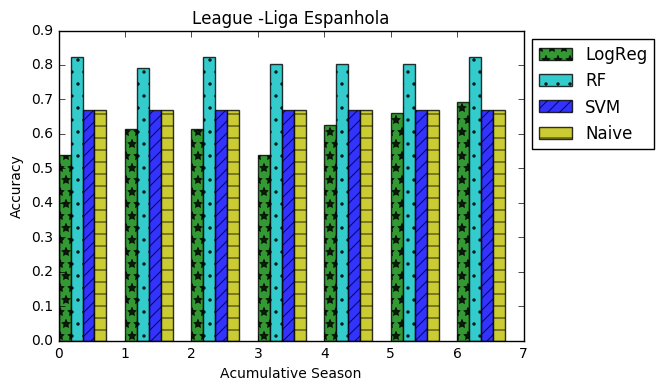

League - 1729
50
LogReg
[0.65384615384615385, 0.63461538461538458, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458]
---
RF
[0.71153846153846156, 0.71153846153846156, 0.67307692307692313, 0.67307692307692313, 0.71153846153846156, 0.71153846153846156, 0.71153846153846156]
---
SVM
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]
---
Naive
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]


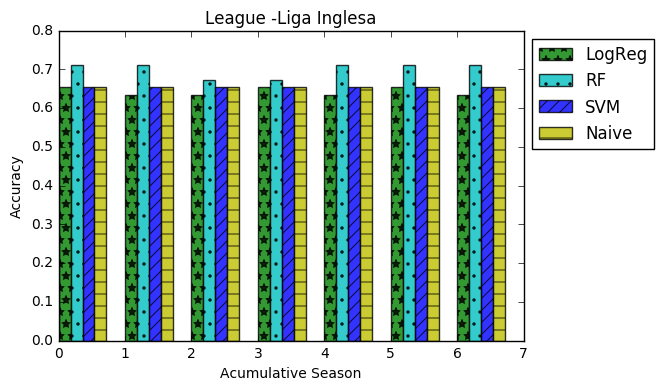

League - 4769
100
LogReg
[0.45652173913043476, 0.54347826086956519, 0.54347826086956519, 0.52173913043478259, 0.56521739130434778, 0.52173913043478259, 0.65217391304347827]
---
RF
[0.63043478260869568, 0.78260869565217395, 0.78260869565217395, 0.76086956521739135, 0.69565217391304346, 0.82608695652173914, 0.80434782608695654]
---
SVM
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]
---
Naive
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]


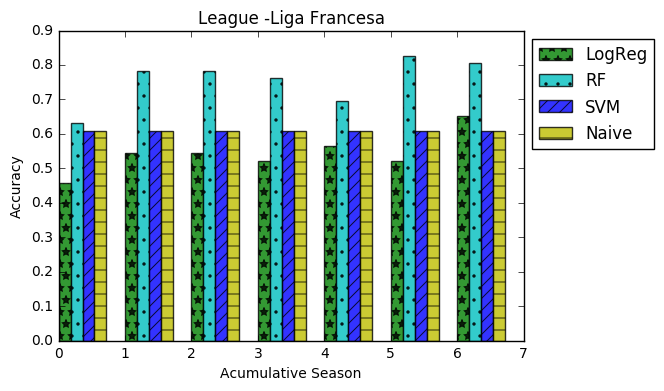

League - 10257
50
LogReg
[0.57352941176470584, 0.55882352941176472, 0.61764705882352944, 0.47058823529411764, 0.58823529411764708, 0.6470588235294118, 0.66176470588235292]
---
RF
[0.6470588235294118, 0.77941176470588236, 0.73529411764705888, 0.72058823529411764, 0.76470588235294112, 0.76470588235294112, 0.76470588235294112]
---
SVM
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]
---
Naive
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]


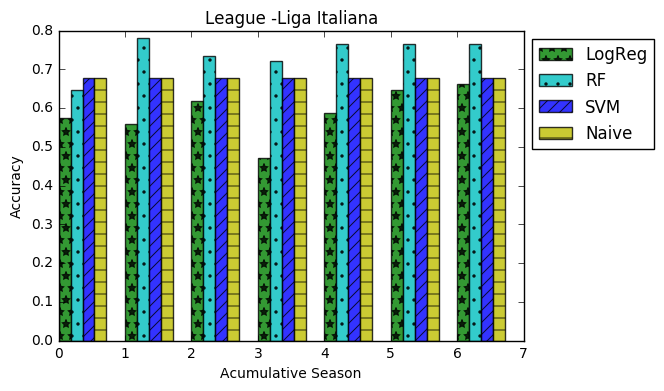

----SF - K2----
League - 21518
0-1
1000
1-2
100
2-3
1000
3-4
50
4-5
500
5-6
50
LogReg
[0.55263157894736847, 0.6404494382022472, 0.44705882352941179, 0.63888888888888884, 0.6428571428571429, 0.61538461538461542]
---
RF
[0.71052631578947367, 0.7303370786516854, 0.83529411764705885, 0.71296296296296291, 0.80612244897959184, 0.82417582417582413]
---
SVM
[0.57894736842105265, 0.5280898876404494, 0.6705882352941176, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.57894736842105265, 0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


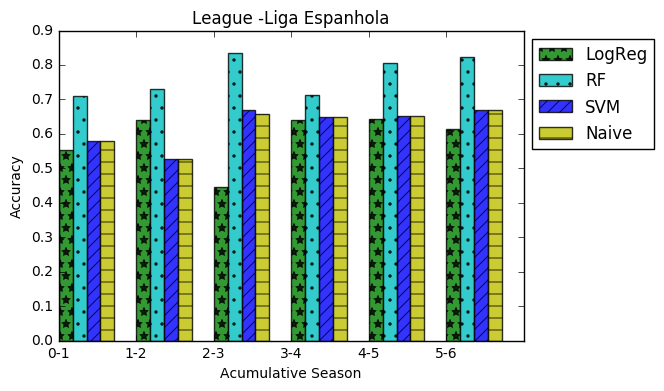

League - 1729
0-1
100
1-2
2000
2-3
1000
3-4
100
4-5
500
5-6
50
LogReg
[0.54545454545454541, 0.57471264367816088, 0.60526315789473684, 0.58227848101265822, 0.55072463768115942, 0.51923076923076927]
---
RF
[0.65151515151515149, 0.67816091954022983, 0.75, 0.77215189873417722, 0.76811594202898548, 0.67307692307692313]
---
SVM
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


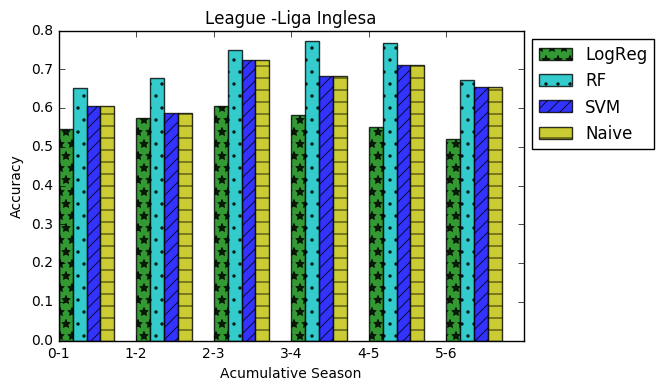

League - 4769
0-1
500
1-2
100
2-3
50
3-4
100
4-5
3000
5-6
50
LogReg
[0.59523809523809523, 0.61904761904761907, 0.57999999999999996, 0.42372881355932202, 0.5625, 0.71739130434782605]
---
RF
[0.69047619047619047, 0.73809523809523814, 0.57999999999999996, 0.61016949152542377, 0.75, 0.82608695652173914]
---
SVM
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


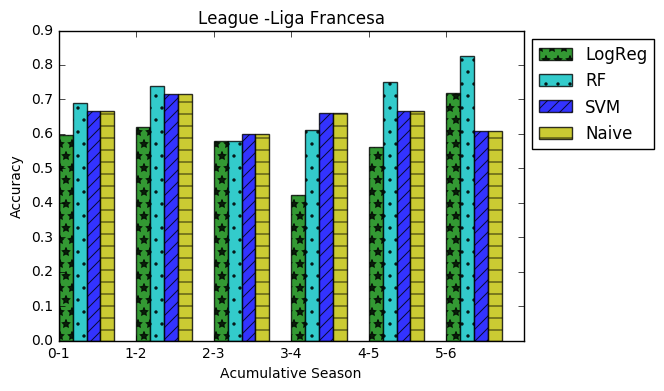

League - 10257
0-1
500
1-2
100
2-3
1000
3-4
1000
4-5
50
5-6
100
LogReg
[0.51666666666666672, 0.48214285714285715, 0.62121212121212122, 0.52000000000000002, 0.52307692307692311, 0.63235294117647056]
---
RF
[0.69999999999999996, 0.625, 0.78787878787878785, 0.80000000000000004, 0.55384615384615388, 0.70588235294117652]
---
SVM
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


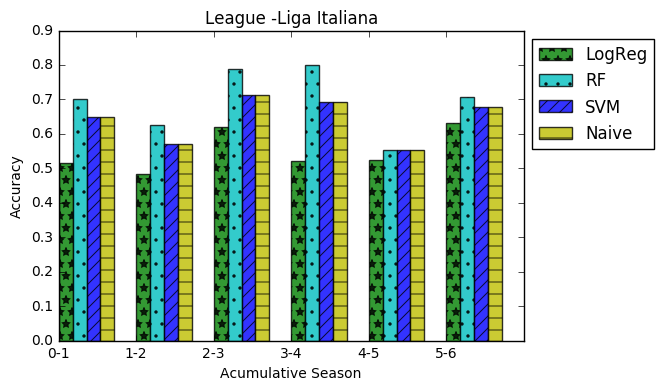

----SF - K3----
League - 21518
0-2
50
1-3
100
2-4
100
3-5
2000
4-6
500
LogReg
[0.6741573033707865, 0.51764705882352946, 0.60185185185185186, 0.61224489795918369, 0.58241758241758246]
---
RF
[0.7303370786516854, 0.80000000000000004, 0.73148148148148151, 0.83673469387755106, 0.8351648351648352]
---
SVM
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


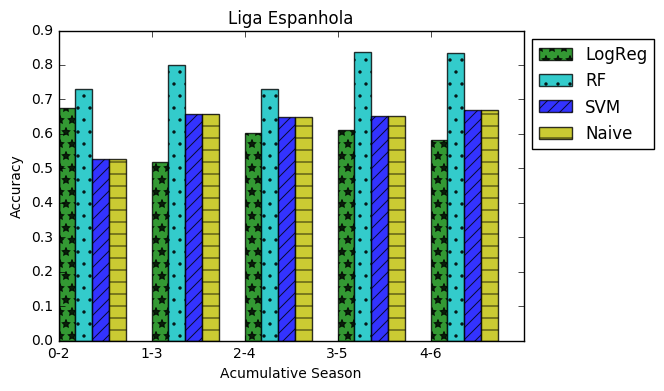

League - 1729
0-2
50
1-3
100
2-4
50
3-5
100
4-6
100
LogReg
[0.58620689655172409, 0.65789473684210531, 0.54430379746835444, 0.43478260869565216, 0.51923076923076927]
---
RF
[0.68965517241379315, 0.76315789473684215, 0.74683544303797467, 0.76811594202898548, 0.69230769230769229]
---
SVM
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


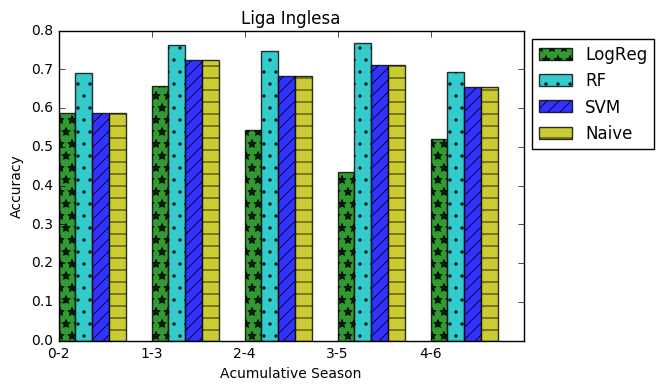

League - 4769
0-2
50
1-3
100
2-4
100
3-5
500
4-6
50
LogReg
[0.5714285714285714, 0.46000000000000002, 0.47457627118644069, 0.41666666666666669, 0.65217391304347827]
---
RF
[0.73809523809523814, 0.56000000000000005, 0.66101694915254239, 0.70833333333333337, 0.80434782608695654]
---
SVM
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


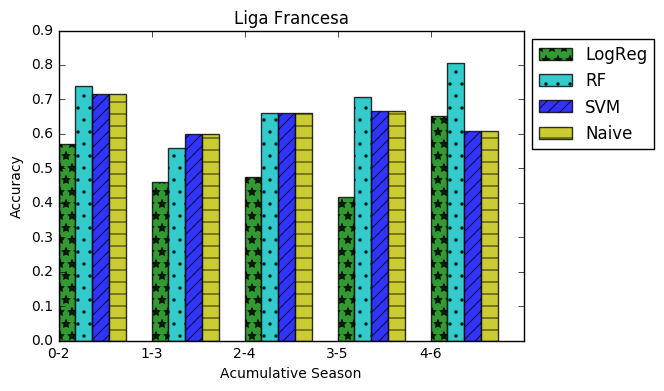

League - 10257
0-2
100
1-3
50
2-4
500
3-5
100
4-6
100
LogReg
[0.39285714285714285, 0.5, 0.54666666666666663, 0.55384615384615388, 0.6029411764705882]
---
RF
[0.6428571428571429, 0.80303030303030298, 0.78666666666666663, 0.56923076923076921, 0.72058823529411764]
---
SVM
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


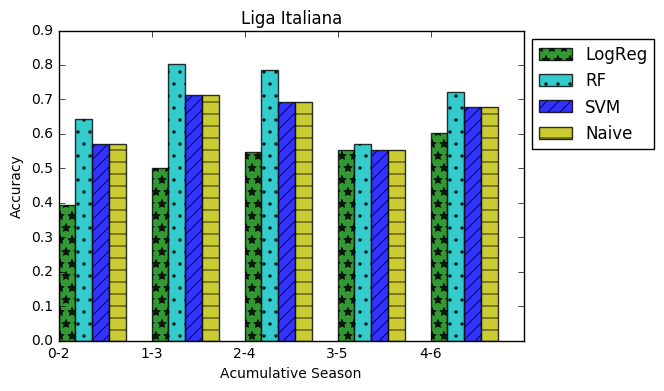

In [19]:
#Super Favoritos
print "----SF - ACC----"
sf_rf_acc_ac = accumulative_acc(sf_data,leagues)
print "----SF - K2----"
sf_rf_acc_k2 = k2_acc(sf_data,leagues)
print "----SF - K3----"
sf_rf_acc_k3 = k3_acc(sf_data,leagues)


----F - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


3000
LogReg
[0.26751592356687898, 0.31847133757961782, 0.32484076433121017, 0.36942675159235666, 0.36942675159235666, 0.38216560509554143, 0.36942675159235666]
---
RF
[0.46496815286624205, 0.48407643312101911, 0.49681528662420382, 0.51592356687898089, 0.49681528662420382, 0.50318471337579618, 0.49681528662420382]
---
SVM
[0.47770700636942676, 0.4713375796178344, 0.47770700636942676, 0.47770700636942676, 0.4713375796178344, 0.4713375796178344, 0.4713375796178344]
---
Naive
[0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676]


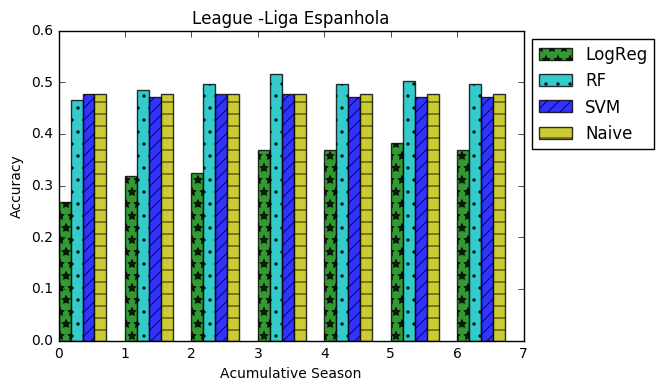

League - 1729
500
LogReg
[0.44886363636363635, 0.39204545454545453, 0.44318181818181818, 0.39772727272727271, 0.39772727272727271, 0.38636363636363635, 0.4375]
---
RF
[0.48295454545454547, 0.46022727272727271, 0.47727272727272729, 0.46590909090909088, 0.5, 0.48863636363636365, 0.47159090909090912]
---
SVM
[0.42613636363636365, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.4375, 0.43181818181818182, 0.42613636363636365]
---
Naive
[0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182]


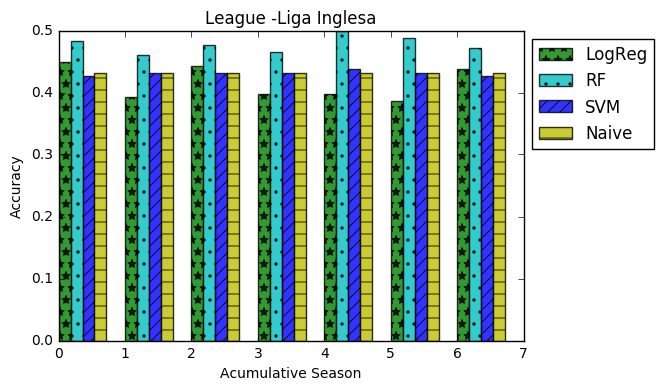

League - 4769
100
LogReg
[0.3532934131736527, 0.3413173652694611, 0.3772455089820359, 0.38323353293413176, 0.3413173652694611, 0.39520958083832336, 0.40119760479041916]
---
RF
[0.41916167664670656, 0.39520958083832336, 0.40119760479041916, 0.43712574850299402, 0.44910179640718562, 0.45508982035928142, 0.47904191616766467]
---
SVM
[0.41916167664670656, 0.43113772455089822, 0.43113772455089822, 0.43712574850299402, 0.43113772455089822, 0.43712574850299402, 0.43712574850299402]
---
Naive
[0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402]


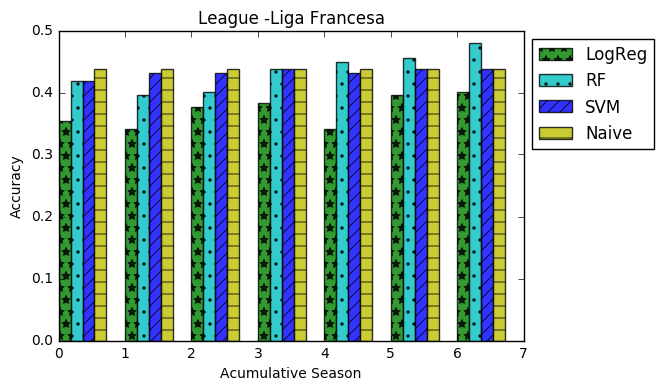

League - 10257
100
LogReg
[0.42937853107344631, 0.40677966101694918, 0.41807909604519772, 0.42372881355932202, 0.4463276836158192, 0.43502824858757061, 0.40112994350282488]
---
RF
[0.47457627118644069, 0.48587570621468928, 0.48587570621468928, 0.48587570621468928, 0.49717514124293788, 0.49152542372881358, 0.51977401129943501]
---
SVM
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.40112994350282488, 0.40112994350282488]
---
Naive
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058]


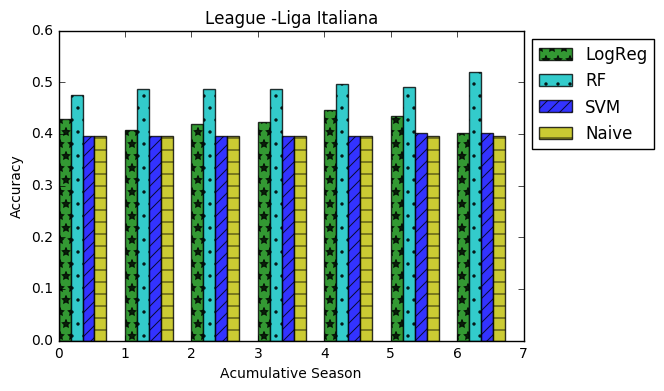

----F - K2----
League - 21518
0-1
2000
1-2
100
2-3
500
3-4
3000
4-5
1000
5-6
50
LogReg
[0.27567567567567569, 0.40259740259740262, 0.35999999999999999, 0.34615384615384615, 0.31168831168831168, 0.32484076433121017]
---
RF
[0.54594594594594592, 0.51298701298701299, 0.42857142857142855, 0.45512820512820512, 0.42207792207792205, 0.49044585987261147]
---
SVM
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.38311688311688313, 0.46496815286624205]
---
Naive
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


League - 1729
0-1
50
1-2
1000
2-3
2000
3-4
2000
4-5
50
5-6
100
LogReg
[0.35714285714285715, 0.35502958579881655, 0.42528735632183906, 0.33950617283950618, 0.42261904761904762, 0.38636363636363635]
---
RF
[0.46153846153846156, 0.4437869822485207, 0.41379310344827586, 0.51851851851851849, 0.47619047619047616, 0.42613636363636365]
---
SVM
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.42857142857142855, 0.42613636363636365]
---
Naive
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


League - 4769
0-1
500
1-2
100
2-3
1000
3-4
50
4-5
500
5-6
1000
LogReg
[0.37948717948717947, 0.40588235294117647, 0.35195530726256985, 0.37640449438202245, 0.36931818181818182, 0.46706586826347307]
---
RF
[0.38974358974358975, 0.44705882352941179, 0.45251396648044695, 0.4157303370786517, 0.47159090909090912, 0.41317365269461076]
---
SVM
[0.39487179487179486, 0.5, 0.46927374301675978, 0.42134831460674155, 0.46022727272727271, 0.43712574850299402]
---
Naive
[0.38974358974358975, 0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


League - 10257
0-1
100
1-2
100
2-3
50
3-4
500
4-5
100
5-6
500
LogReg
[0.36363636363636365, 0.40259740259740262, 0.38953488372093026, 0.38596491228070173, 0.34682080924855491, 0.33333333333333331]
---
RF
[0.52121212121212124, 0.4935064935064935, 0.44767441860465118, 0.42105263157894735, 0.42196531791907516, 0.39548022598870058]
---
SVM
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


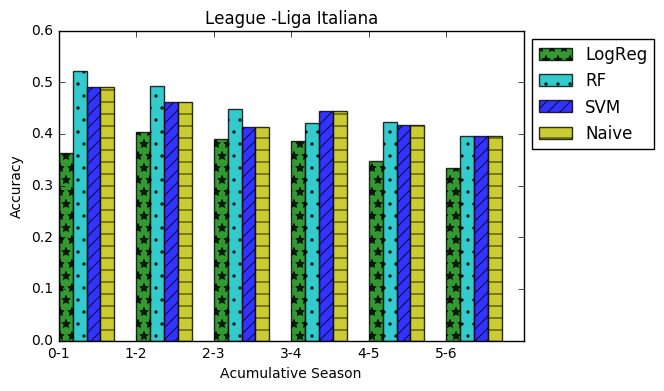

----F - K3----
League - 21518
0-2
100
1-3
2000
2-4
100
3-5
500
4-6
500
LogReg
[0.38961038961038963, 0.40571428571428569, 0.37179487179487181, 0.31818181818181818, 0.3503184713375796]
---
RF
[0.51298701298701299, 0.4514285714285714, 0.42948717948717946, 0.42857142857142855, 0.46496815286624205]
---
SVM
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.37662337662337664, 0.46496815286624205]
---
Naive
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


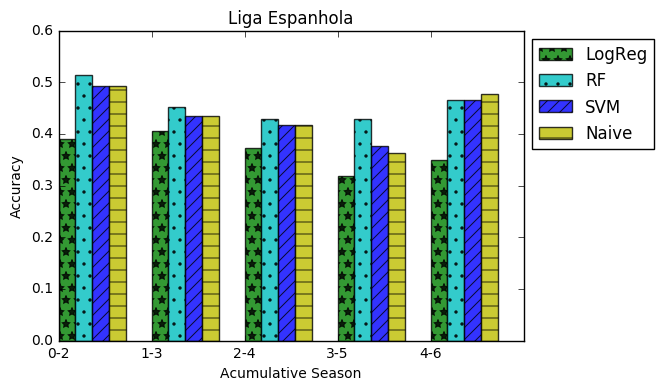

League - 1729
0-2
2000
1-3
100
2-4
100
3-5
3000
4-6
3000
LogReg
[0.36686390532544377, 0.40229885057471265, 0.33950617283950618, 0.48809523809523808, 0.36931818181818182]
---
RF
[0.46745562130177515, 0.42528735632183906, 0.52469135802469136, 0.47619047619047616, 0.46590909090909088]
---
SVM
[0.46153846153846156, 0.36781609195402298, 0.40740740740740738, 0.41666666666666669, 0.43181818181818182]
---
Naive
[0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


League - 4769
0-2
50
1-3
3000
2-4
100
3-5
100
4-6
50
LogReg
[0.36470588235294116, 0.39664804469273746, 0.33707865168539325, 0.39204545454545453, 0.45508982035928142]
---
RF
[0.44705882352941179, 0.46368715083798884, 0.4101123595505618, 0.47727272727272729, 0.43712574850299402]
---
SVM
[0.50588235294117645, 0.46927374301675978, 0.4157303370786517, 0.45454545454545453, 0.43113772455089822]
---
Naive
[0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


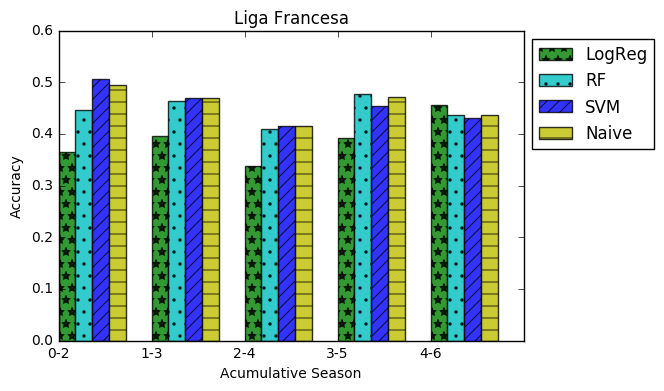

League - 10257
0-2
1000
1-3
2000
2-4
2000
3-5
50
4-6
1000
LogReg
[0.40909090909090912, 0.38953488372093026, 0.39766081871345027, 0.41040462427745666, 0.33898305084745761]
---
RF
[0.5, 0.46511627906976744, 0.45614035087719296, 0.41618497109826591, 0.51412429378531077]
---
SVM
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


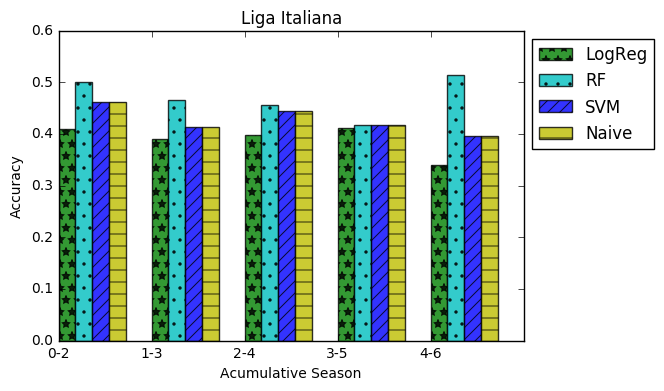

In [20]:
#Favoritos
print "----F - ACC----"
f_rf_acc_ac = accumulative_acc(f_data,leagues)
print "----F - K2----"
f_rf_acc_k2 = k2_acc(f_data,leagues)
print "----F - K3----"
f_rf_acc_k3 = k3_acc(f_data,leagues)


----EQ - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


50
LogReg
[0.3902439024390244, 0.3048780487804878, 0.32926829268292684, 0.37804878048780488, 0.34146341463414637, 0.40243902439024393, 0.40243902439024393]
---
RF
[0.42682926829268292, 0.40243902439024393, 0.42682926829268292, 0.37804878048780488, 0.3902439024390244, 0.3902439024390244, 0.37804878048780488]
---
SVM
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]
---
Naive
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]


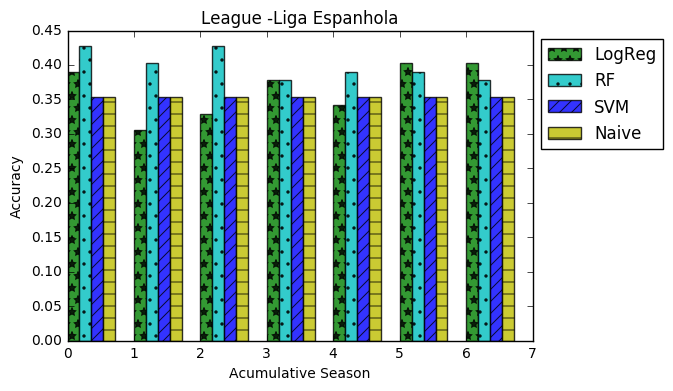

League - 1729
3000
LogReg
[0.30392156862745096, 0.26470588235294118, 0.38235294117647056, 0.36274509803921567, 0.39215686274509803, 0.39215686274509803, 0.40196078431372551]
---
RF
[0.24509803921568626, 0.34313725490196079, 0.31372549019607843, 0.30392156862745096, 0.31372549019607843, 0.39215686274509803, 0.38235294117647056]
---
SVM
[0.29411764705882354, 0.28431372549019607, 0.30392156862745096, 0.29411764705882354, 0.30392156862745096, 0.30392156862745096, 0.27450980392156865]
---
Naive
[0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096]


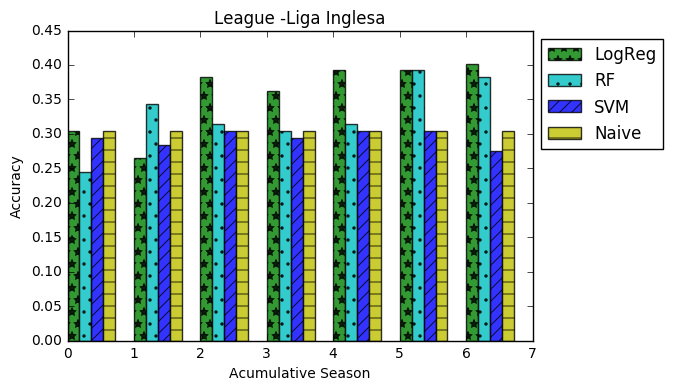

League - 4769
500
LogReg
[0.34482758620689657, 0.27586206896551724, 0.29310344827586204, 0.35344827586206895, 0.35344827586206895, 0.35344827586206895, 0.31896551724137934]
---
RF
[0.35344827586206895, 0.31034482758620691, 0.26724137931034481, 0.28448275862068967, 0.31896551724137934, 0.30172413793103448, 0.31896551724137934]
---
SVM
[0.29310344827586204, 0.31896551724137934, 0.31034482758620691, 0.31034482758620691, 0.31034482758620691, 0.34482758620689657, 0.31896551724137934]
---
Naive
[0.29310344827586204, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657]


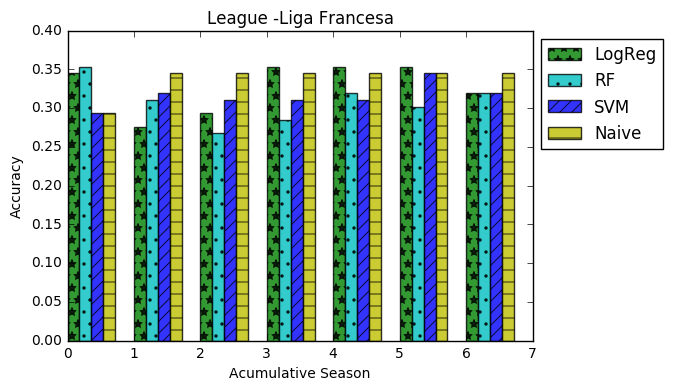

League - 10257
1000
LogReg
[0.38823529411764707, 0.37647058823529411, 0.44705882352941179, 0.40000000000000002, 0.36470588235294116, 0.40000000000000002, 0.42352941176470588]
---
RF
[0.38823529411764707, 0.37647058823529411, 0.36470588235294116, 0.44705882352941179, 0.4823529411764706, 0.4823529411764706, 0.42352941176470588]
---
SVM
[0.40000000000000002, 0.40000000000000002, 0.38823529411764707, 0.40000000000000002, 0.38823529411764707, 0.37647058823529411, 0.36470588235294116]
---
Naive
[0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002, 0.40000000000000002]


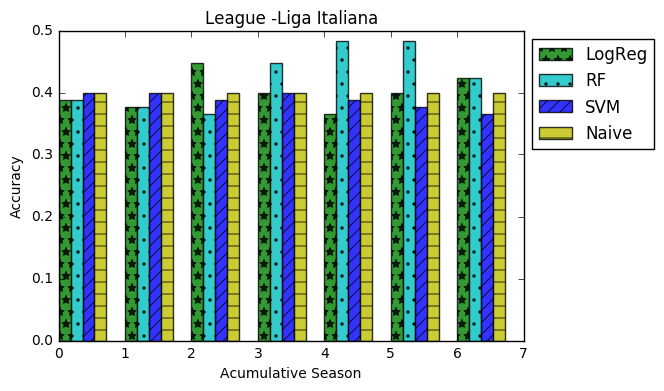

----EQ - K2----
League - 21518
0-1
50
1-2
500
2-3
100
3-4
500
4-5
1000
5-6
50
LogReg
[0.3188405797101449, 0.40229885057471265, 0.31428571428571428, 0.37878787878787878, 0.35897435897435898, 0.32926829268292684]
---
RF
[0.43478260869565216, 0.45977011494252873, 0.40000000000000002, 0.34848484848484851, 0.38461538461538464, 0.42682926829268292]
---
SVM
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.34146341463414637]
---
Naive
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


League - 1729
0-1
50
1-2
50
2-3
2000
3-4
100
4-5
500
5-6
100
LogReg
[0.35365853658536583, 0.41891891891891891, 0.3125, 0.3595505617977528, 0.32258064516129031, 0.33333333333333331]
---
RF
[0.31707317073170732, 0.40540540540540543, 0.40000000000000002, 0.449438202247191, 0.35483870967741937, 0.35294117647058826]
---
SVM
[0.40243902439024393, 0.28378378378378377, 0.3125, 0.3146067415730337, 0.37634408602150538, 0.29411764705882354]
---
Naive
[0.40243902439024393, 0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


League - 4769
0-1
50
1-2
50
2-3
50
3-4
1000
4-5
500
5-6
100
LogReg
[0.30434782608695654, 0.33898305084745761, 0.29702970297029702, 0.30107526881720431, 0.31132075471698112, 0.29310344827586204]
---
RF
[0.33695652173913043, 0.32203389830508472, 0.31683168316831684, 0.34408602150537637, 0.33962264150943394, 0.37068965517241381]
---
SVM
[0.35869565217391303, 0.40677966101694918, 0.32673267326732675, 0.33333333333333331, 0.32075471698113206, 0.36206896551724138]
---
Naive
[0.38043478260869568, 0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.330188679245283, 0.34482758620689657]


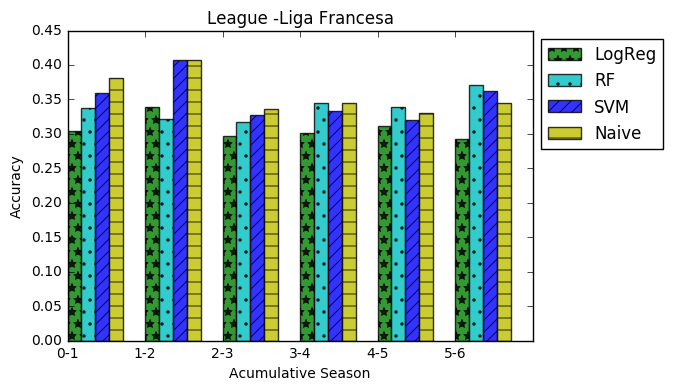

League - 10257
0-1
50
1-2
100
2-3
100
3-4
100
4-5
3000
5-6
2000
LogReg
[0.3235294117647059, 0.3473684210526316, 0.40659340659340659, 0.38095238095238093, 0.4175824175824176, 0.36470588235294116]
---
RF
[0.36274509803921567, 0.49473684210526314, 0.38461538461538464, 0.42857142857142855, 0.32967032967032966, 0.3411764705882353]
---
SVM
[0.33333333333333331, 0.40000000000000002, 0.39560439560439559, 0.35714285714285715, 0.27472527472527475, 0.29411764705882354]
---
Naive
[0.34313725490196079, 0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.30588235294117649]


----EQ - K3----
League - 21518
0-2
2000
1-3
100
2-4
100
3-5
100
4-6
500
LogReg
[0.33333333333333331, 0.38571428571428573, 0.36363636363636365, 0.35897435897435898, 0.37804878048780488]
---
RF
[0.39080459770114945, 0.41428571428571431, 0.33333333333333331, 0.34615384615384615, 0.37804878048780488]
---
SVM
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]
---
Naive
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


League - 1729
0-2
50
1-3
500
2-4
1000
3-5
50
4-6
2000
LogReg
[0.35135135135135137, 0.29999999999999999, 0.38202247191011235, 0.37634408602150538, 0.33333333333333331]
---
RF
[0.33783783783783783, 0.40000000000000002, 0.4044943820224719, 0.36559139784946237, 0.48039215686274511]
---
SVM
[0.28378378378378377, 0.29999999999999999, 0.29213483146067415, 0.37634408602150538, 0.3235294117647059]
---
Naive
[0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


League - 4769
0-2
500
1-3
50
2-4
500
3-5
100
4-6
500
LogReg
[0.33898305084745761, 0.27722772277227725, 0.29032258064516131, 0.30188679245283018, 0.31034482758620691]
---
RF
[0.38983050847457629, 0.35643564356435642, 0.35483870967741937, 0.3867924528301887, 0.37931034482758619]
---
SVM
[0.40677966101694918, 0.32673267326732675, 0.32258064516129031, 0.39622641509433965, 0.35344827586206895]
---
Naive
[0.40677966101694918, 0.33663366336633666, 0.34408602150537637, 0.3867924528301887, 0.34482758620689657]


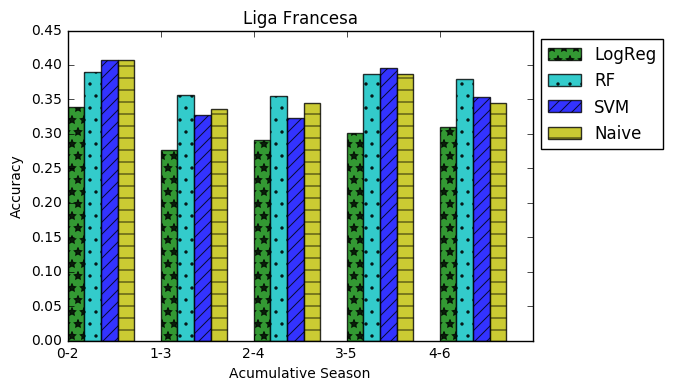

League - 10257
0-2
2000
1-3
100
2-4
1000
3-5
100
4-6
3000
LogReg
[0.32631578947368423, 0.39560439560439559, 0.42857142857142855, 0.30769230769230771, 0.3411764705882353]
---
RF
[0.4631578947368421, 0.42857142857142855, 0.45238095238095238, 0.4175824175824176, 0.41176470588235292]
---
SVM
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2857142857142857, 0.38823529411764707]
---
Naive
[0.41052631578947368, 0.4175824175824176, 0.35714285714285715, 0.2967032967032967, 0.40000000000000002]


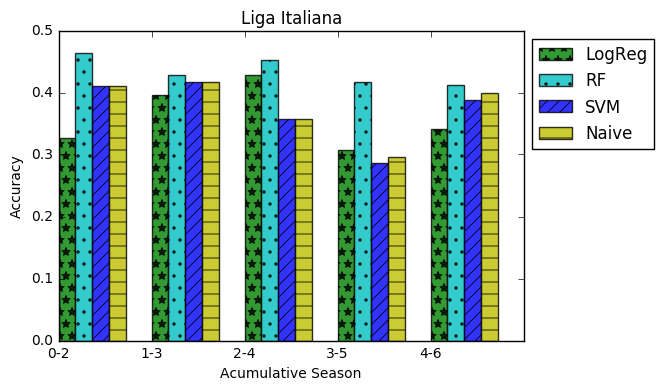

In [21]:
#Super Favoritos
print "----EQ - ACC----"
eq_rf_acc_ac = accumulative_acc(eq_data,leagues)
print "----EQ - K2----"
eq_rf_acc_k2 = k2_acc(eq_data,leagues)
print "----EQ - K3----"
eq_rf_acc_k3 = k3_acc(eq_data,leagues)

In [4]:
from sklearn.metrics import f1_score

def setRFf1(X_train,y_train,X_test,y_test):
    n = [50,100,500,1000,2000,3000]
    f1mac = 0
    f1mic = 0
    nmax = 0
    max=0
    rf_max = []
    
    
    for estimator in n :
        rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_test) 
        f1_mic = f1_score(y_test, y_pred, average='micro')
        f1_mac = f1_score(y_test, y_pred, average='macro')
        if ( (f1_mic+f1_mac)/2 > max):
            max = (f1_mic+f1_mac)/2
            f1mac = f1_mac
            f1mic= f1_mic
            nmax=estimator
            rf_max=rf
            
    return f1mac,f1mic, nmax,rf_max

In [5]:
def accumulative_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        test = dado_aux[dado_aux['season']>= limit[-1]]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        rf_list=[]
       
        for s in season:
            train= dado_aux[dado_aux['season']<= s]

            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
        
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            rf_list.append(rfmax)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
            #ynaive=[y_train['Output'].mode()[0]]*len(y_test)
            ynaive=[y_train.mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            
        print rf_estimator
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season,log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
    
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season,log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
        

        plt.title(IDtoStr(league))   
        plt.ylabel('F1-Macro')
        plt.xlabel('Temporadas Acumuladas')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k2_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        base= season[0]
        xs=[]
        rf_list=[]
        for i in range(1,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season']==upper+1]


            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            aux = str(base) + "-" + str(upper)
            print aux

            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
            rf_list.append(rfmax)
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
        
            #ynaive=[y_train.mode()[0]]*len(y_test)
            ynaive=[y_train.mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            xs.append(str(aux))
            print rf_estimator
            base = upper
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-1],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-1], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season[:-1],log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-1]+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-1]+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-1]+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Macro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-1], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list

def k3_f1(dados,leagues):
    for league in leagues:
        dado_aux = dados[dados['league_id'] == league]
    
        limit = dado_aux[['league_id','season']]['season'].unique()
        season = limit[:-1]
        print "League - " + str(league)
        log=[]
        svm=[]
        rdf=[]
        log2=[]
        svm2=[]
        rdf2=[]
        naive=[]
        naive2=[]
        base= season[0]
        xs=[]
        rf_list=[]
        for i in range(2,len(season)):
            upper= season[i]
        
            dado= dado_aux[dado_aux['season']<= upper]
            train= dado[dado['season']>= base]
            test = dado_aux[dado_aux['season']==upper+1]


            X_train= train[ft]
            y_train = train['Output']
            X_test = test[ft]
            y_test = test['Output']

            aux = str(base) + "-" + str(upper)
            print aux

            rf_mic,rf_mac,rf_estimator,rfmax = setRFf1(X_train,y_train,X_test,y_test)
            svc_model = SVC(C=1)
            svc_model.fit(X_train,y_train)
        
            log_reg = LogisticRegression()
            log_reg.fit(X_train,y_train)
        
            logp = log_reg.predict(X_test)
            log.append(f1_score(y_test, logp, average='micro'))
            log2.append(f1_score(y_test, logp, average='macro'))
            rf_list.append(rfmax)
            svmp = svc_model.predict(X_test)
        
            rdf.append(rf_mic)
            rdf2.append(rf_mac)
            svm.append(f1_score(y_test, svmp, average='micro'))
            svm2.append(f1_score(y_test, svmp, average='macro'))
        
            ynaive=[y_train.mode()[0]]*len(y_test)
            naive.append(f1_score(y_test, ynaive, average='micro'))
            naive2.append(f1_score(y_test, ynaive, average='macro'))
            xs.append(str(aux))
            print rf_estimator
            base = upper-1
        print "LogReg"
        print log
        print "---\nRF"
        print rdf
        print "---\nSVM"
        print svm
        print "---\nNaive"
        print naive
        plt.figure()
    
        plt.bar(season[:-2],log,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Micro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-2], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    
        plt.figure()
    
        plt.bar(season[:-2],log2,bar_width,alpha=0.8,color='g',label='LogReg',hatch='*')
        plt.bar(season[:-2]+bar_width,rdf2,bar_width,alpha=0.8,color='c',label='RF',hatch='.')
        plt.bar(season[:-2]+(bar_width*2),svm2,bar_width,alpha=0.8,color='b',label='SVM', hatch='//')
        plt.bar(season[:-2]+(bar_width*3),naive2,bar_width,alpha=0.8,color='y',label='Naive', hatch='-')
    

        plt.title('League -'+str(league))
        plt.ylabel('F1-Macro')
        plt.xlabel('Acumulative Season')
        plt.xticks(season[:-2], xs)
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
        plt.show()
    return rf_list


In [33]:
train= data[data['season']<=2]
test = data[data['season']==6]
X_train= train[ft]
y_train = train['Output']
y_train.mode()[0]


'H'

----F - ACC----
League - 21518
2000
LogReg
[0.53846153846153844, 0.61538461538461542, 0.61538461538461542, 0.53846153846153844, 0.62637362637362637, 0.65934065934065933, 0.69230769230769229]
---
RF
[0.57192460317460314, 0.55349593495934968, 0.5785060975609756, 0.55562285483545326, 0.55937520005121311, 0.56131981713377055, 0.56224593495934949]
---
SVM
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]
---
Naive
[0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028, 0.67032967032967028]


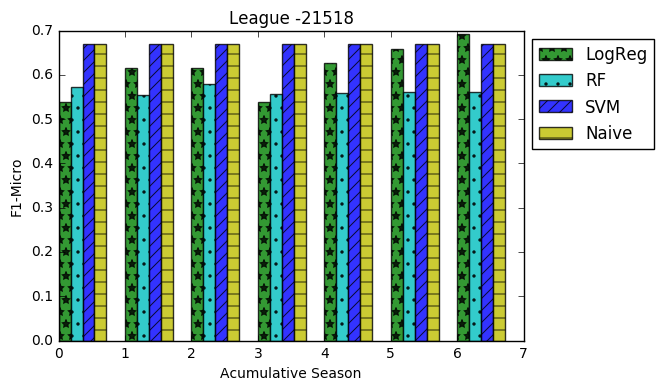

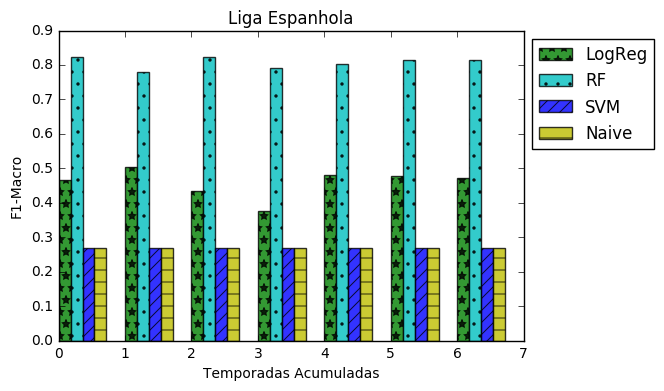

League - 1729
50
LogReg
[0.65384615384615385, 0.63461538461538458, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458, 0.65384615384615385, 0.63461538461538458]
---
RF
[0.51884700665188477, 0.4408741750513902, 0.45155256266367383, 0.4836052836052836, 0.50710955710955707, 0.61899766899766895, 0.39864498644986446]
---
SVM
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]
---
Naive
[0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385, 0.65384615384615385]


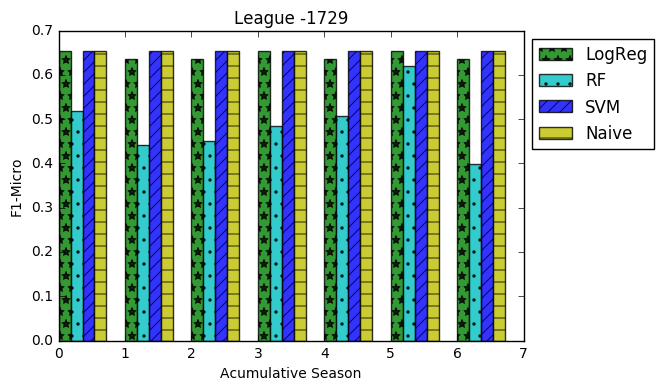

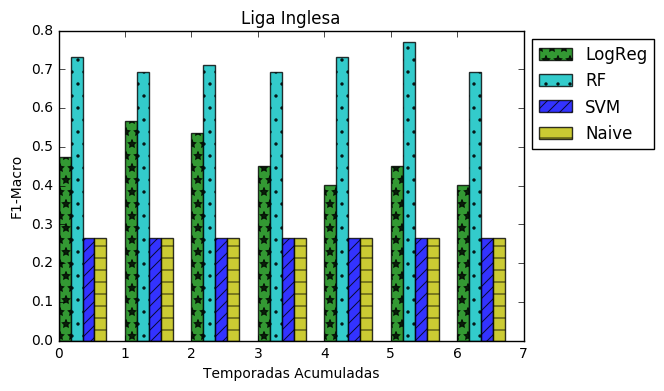

League - 4769
100
LogReg
[0.45652173913043476, 0.54347826086956519, 0.54347826086956519, 0.52173913043478259, 0.56521739130434778, 0.52173913043478259, 0.65217391304347827]
---
RF
[0.39202279202279205, 0.63045634920634919, 0.57321937321937322, 0.62638888888888899, 0.50416666666666676, 0.56439393939393945, 0.56439393939393945]
---
SVM
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]
---
Naive
[0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308, 0.60869565217391308]


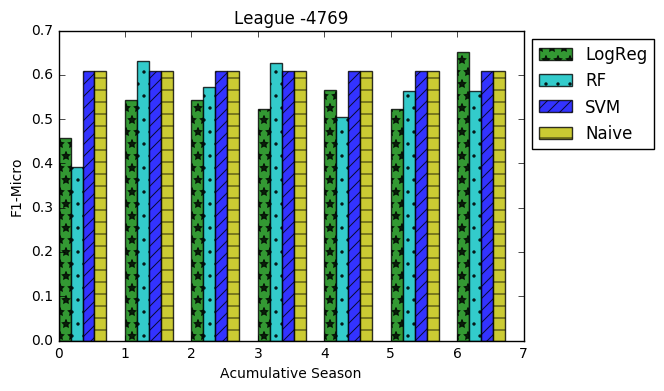

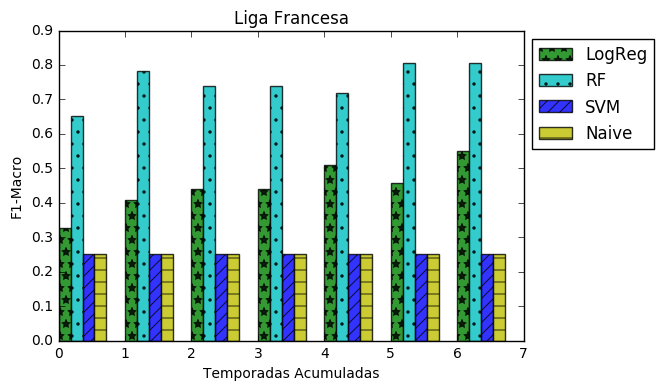

League - 10257
50
LogReg
[0.57352941176470584, 0.55882352941176472, 0.61764705882352944, 0.47058823529411764, 0.58823529411764708, 0.6470588235294118, 0.66176470588235292]
---
RF
[0.49054651647893199, 0.56275303643724695, 0.53862433862433867, 0.51965196519651957, 0.54871794871794877, 0.54871794871794877, 0.54498381877022661]
---
SVM
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]
---
Naive
[0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416, 0.67647058823529416]


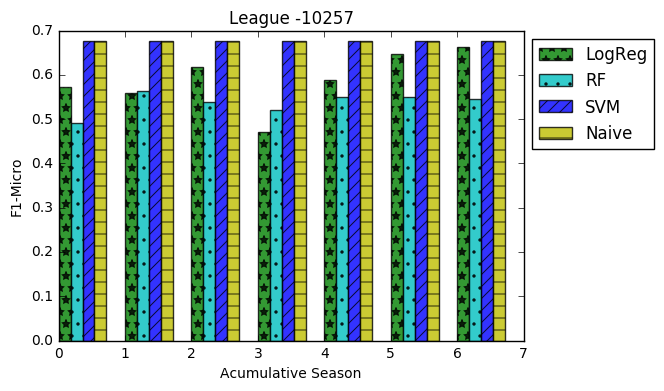

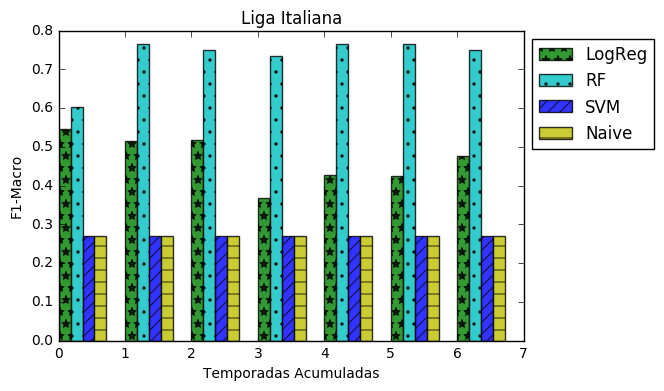

----F - K2----
League - 21518
0-1


NameError: global name 'rf_list' is not defined

In [35]:
#Favoritos
print "----F - ACC----"
sf_rf_f1_ac = accumulative_f1(sf_data,leagues)


----F - K2----
League - 21518
0-1
100
1-2
50
2-3
500
3-4
50
4-5
100
5-6
500
LogReg
[0.55263157894736847, 0.6404494382022472, 0.44705882352941179, 0.63888888888888884, 0.6428571428571429, 0.61538461538461542]
---
RF
[0.49444444444444446, 0.59777777777777785, 0.66454958848509904, 0.49311575726670065, 0.55343551245959755, 0.57192460317460314]
---
SVM
[0.57894736842105265, 0.5280898876404494, 0.6705882352941176, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.57894736842105265, 0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


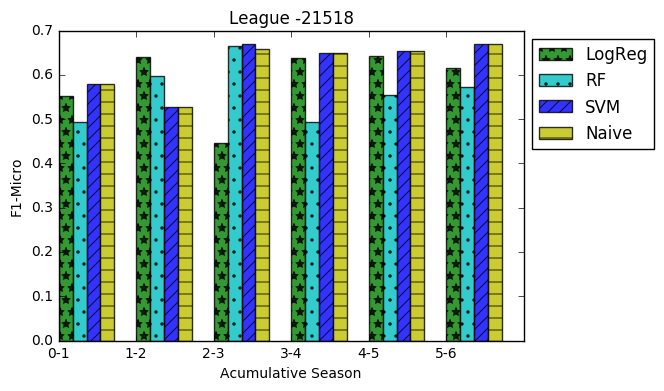

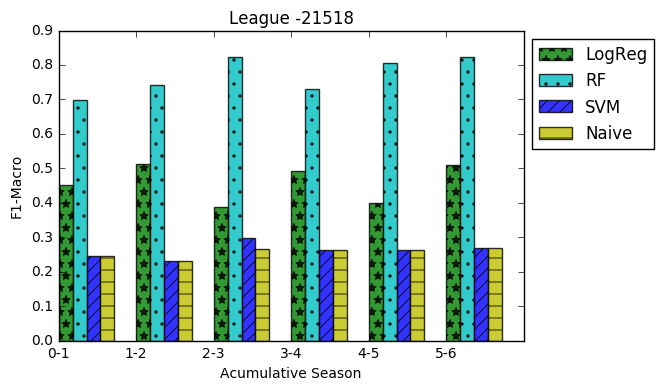

League - 1729
0-1
100
1-2
50
2-3
500
3-4
50
4-5
50
5-6
50
LogReg
[0.54545454545454541, 0.57471264367816088, 0.60526315789473684, 0.58227848101265822, 0.55072463768115942, 0.51923076923076927]
---
RF
[0.40665154950869237, 0.56010205941315838, 0.52275132275132263, 0.53577586206896555, 0.50064977257959709, 0.38776655443322117]
---
SVM
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.60606060606060608, 0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


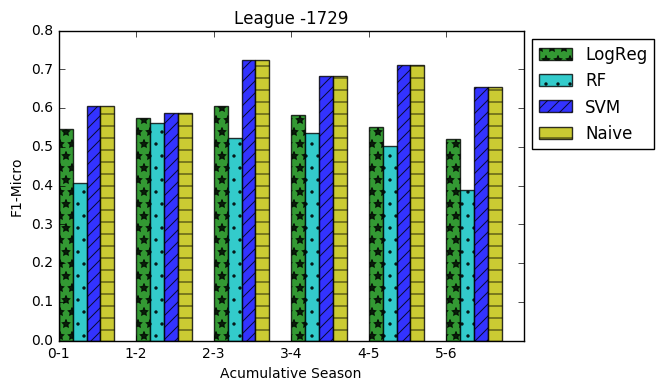

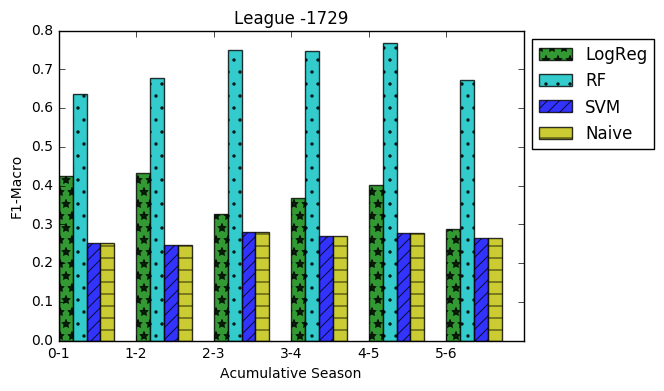

League - 4769
0-1
1000
1-2
100
2-3
1000
3-4
100
4-5
50
5-6
100
LogReg
[0.59523809523809523, 0.61904761904761907, 0.57999999999999996, 0.42372881355932202, 0.5625, 0.71739130434782605]
---
RF
[0.53055555555555556, 0.27777777777777773, 0.24786324786324784, 0.30531400966183569, 0.49002347417840375, 0.65713587487781044]
---
SVM
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.66666666666666663, 0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


League - 10257
0-1
500
1-2
100
2-3
100
3-4
1000
4-5
50
5-6
2000
LogReg
[0.51666666666666672, 0.48214285714285715, 0.62121212121212122, 0.52000000000000002, 0.52307692307692311, 0.63235294117647056]
---
RF
[0.44728132387706854, 0.47497683039851718, 0.51153039832285108, 0.59835375352616726, 0.39107701051435068, 0.47171945701357459]
---
SVM
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.65000000000000002, 0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


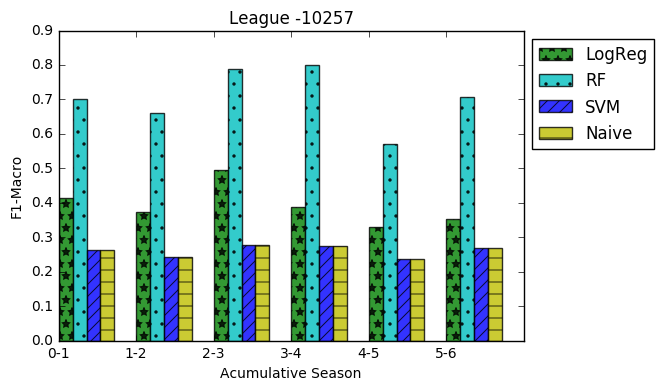

----F - K3----
League - 21518
0-2
2000
1-3
100
2-4
100
3-5
500
4-6
500
LogReg
[0.6741573033707865, 0.51764705882352946, 0.60185185185185186, 0.61224489795918369, 0.58241758241758246]
---
RF
[0.58198794669382903, 0.60751865082258016, 0.49672063096720631, 0.56686565641104136, 0.57192460317460314]
---
SVM
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]
---
Naive
[0.5280898876404494, 0.6588235294117647, 0.64814814814814814, 0.65306122448979587, 0.67032967032967028]


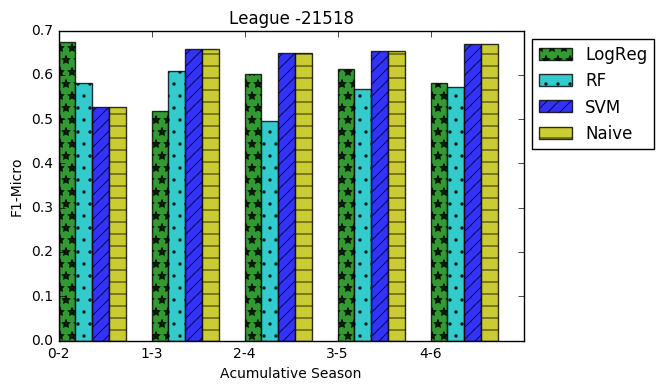

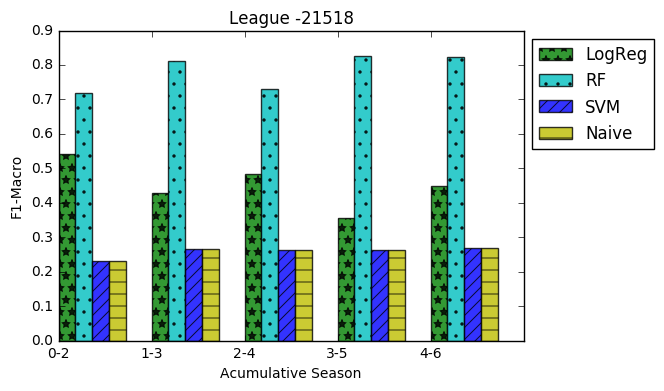

League - 1729
0-2
100
1-3
100
2-4
50
3-5
100
4-6
100
LogReg
[0.58620689655172409, 0.65789473684210531, 0.54430379746835444, 0.43478260869565216, 0.51923076923076927]
---
RF
[0.49732868757259002, 0.48052181736392258, 0.53857357035767828, 0.47609427609427613, 0.39430449069003287]
---
SVM
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]
---
Naive
[0.58620689655172409, 0.72368421052631582, 0.68354430379746833, 0.71014492753623193, 0.65384615384615385]


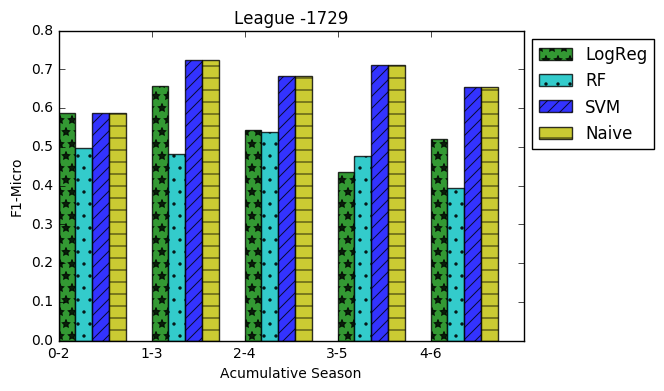

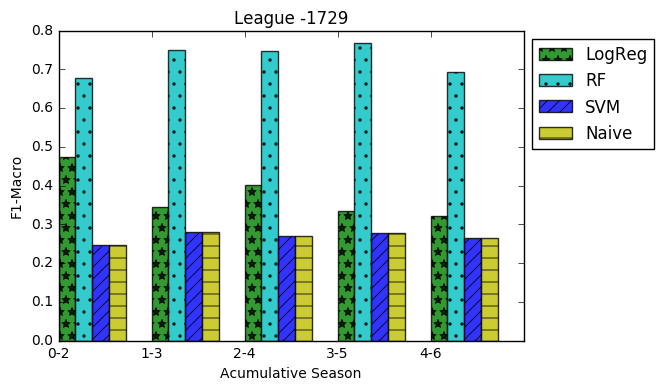

League - 4769
0-2
50
1-3
100
2-4
50
3-5
1000
4-6
50
LogReg
[0.5714285714285714, 0.46000000000000002, 0.47457627118644069, 0.41666666666666669, 0.65217391304347827]
---
RF
[0.27777777777777773, 0.39167338168143973, 0.41756568758694906, 0.4406392694063927, 0.56439393939393945]
---
SVM
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]
---
Naive
[0.7142857142857143, 0.59999999999999998, 0.66101694915254239, 0.66666666666666663, 0.60869565217391308]


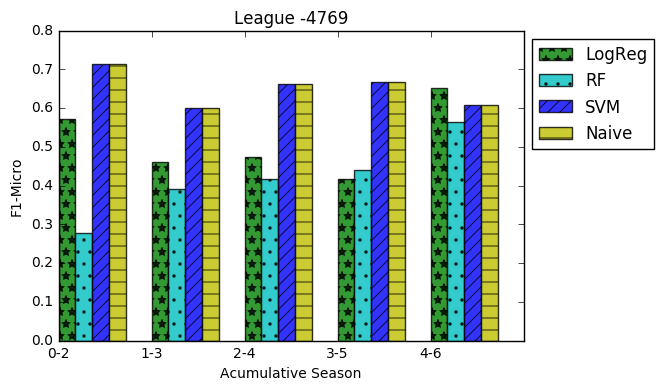

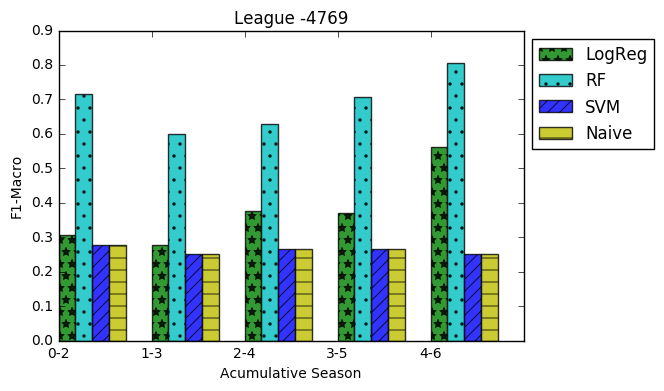

League - 10257
0-2
1000
1-3
500
2-4
50
3-5
100
4-6
50
LogReg
[0.39285714285714285, 0.5, 0.54666666666666663, 0.55384615384615388, 0.6029411764705882]
---
RF
[0.42369477911646586, 0.52812900861279088, 0.54456654456654452, 0.42746992516813487, 0.55189255189255182]
---
SVM
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]
---
Naive
[0.5714285714285714, 0.71212121212121215, 0.69333333333333336, 0.55384615384615388, 0.67647058823529416]


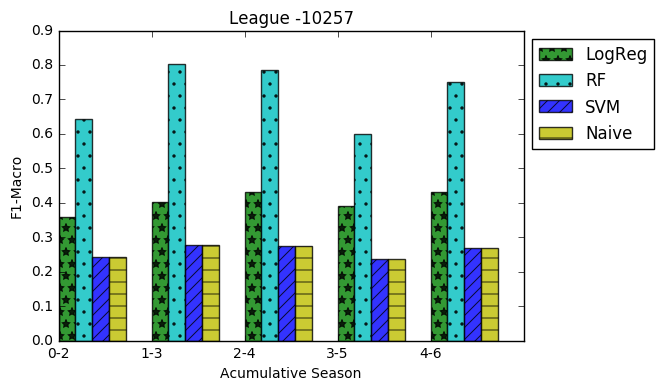

In [37]:
print "----F - K2----"
sf_rf_f1_k2 = k2_f1(sf_data,leagues)
print "----F - K3----"
sf_rf_f1_k3 = k3_f1(sf_data,leagues)


----F - ACC----
League - 21518
2000
LogReg
[0.26751592356687898, 0.31847133757961782, 0.32484076433121017, 0.36942675159235666, 0.36942675159235666, 0.38216560509554143, 0.36942675159235666]
---
RF
[0.35671648612825085, 0.41113575433251515, 0.36797178130511465, 0.41713060866312773, 0.35815621917316837, 0.35746389625699965, 0.34449021103483352]
---
SVM
[0.47770700636942676, 0.4713375796178344, 0.47770700636942676, 0.47770700636942676, 0.4713375796178344, 0.4713375796178344, 0.4713375796178344]
---
Naive
[0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676, 0.47770700636942676]


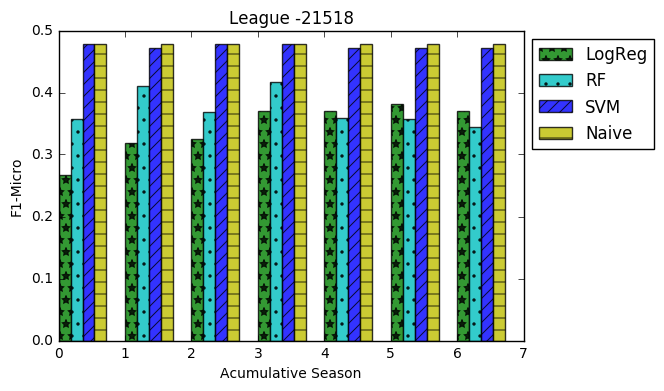

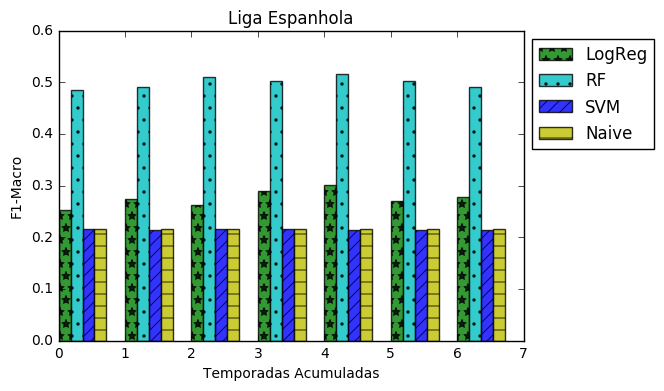

League - 1729
500
LogReg
[0.44886363636363635, 0.39204545454545459, 0.44318181818181823, 0.39772727272727276, 0.39772727272727276, 0.38636363636363635, 0.4375]
---
RF
[0.43635391233577492, 0.4080384368024817, 0.36763013701733049, 0.40089610035194695, 0.40086569664034455, 0.40012163230554032, 0.38456679725202975]
---
SVM
[0.42613636363636365, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.4375, 0.43181818181818182, 0.42613636363636365]
---
Naive
[0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182, 0.43181818181818182]


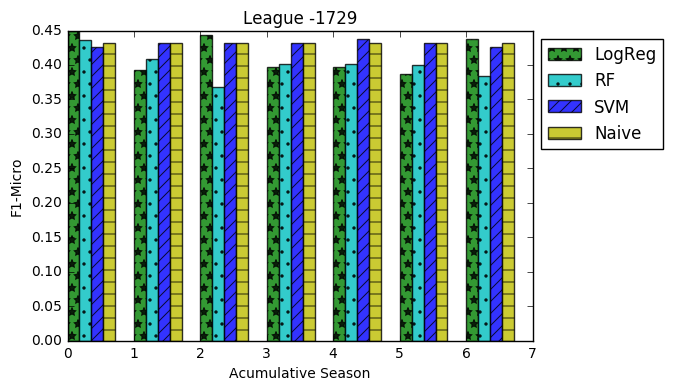

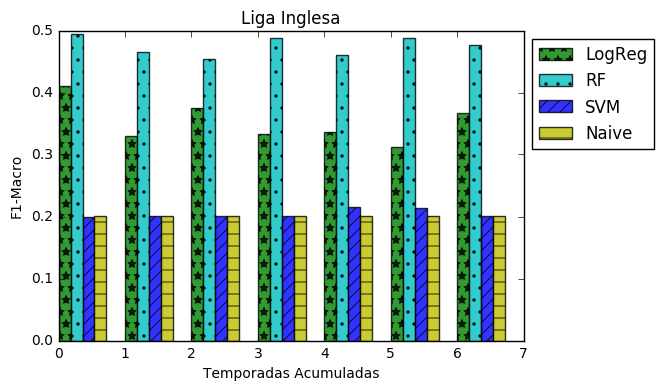

League - 4769
50
LogReg
[0.3532934131736527, 0.3413173652694611, 0.3772455089820359, 0.38323353293413176, 0.3413173652694611, 0.39520958083832336, 0.40119760479041922]
---
RF
[0.38892797581821981, 0.36061370645054414, 0.38527784591066411, 0.38970051391104016, 0.3799647266313933, 0.34521420608377129, 0.39497687720579289]
---
SVM
[0.4191616766467065, 0.43113772455089822, 0.43113772455089822, 0.43712574850299402, 0.43113772455089822, 0.43712574850299402, 0.43712574850299402]
---
Naive
[0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402, 0.43712574850299402]


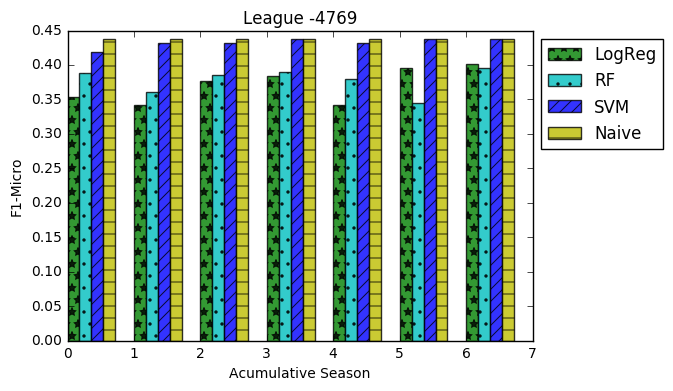

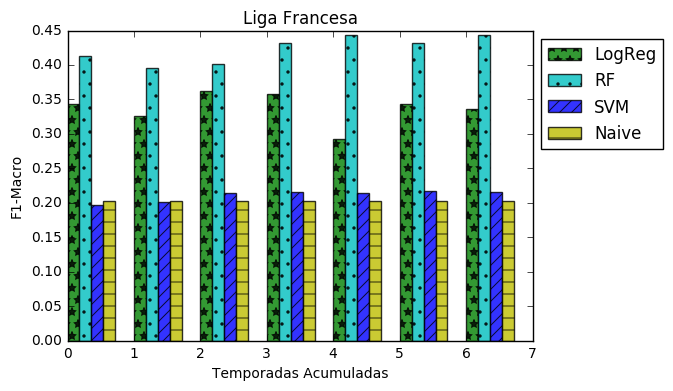

League - 10257
2000
LogReg
[0.42937853107344631, 0.40677966101694923, 0.41807909604519772, 0.42372881355932202, 0.4463276836158192, 0.43502824858757055, 0.40112994350282488]
---
RF
[0.38377517841504094, 0.37910869126840091, 0.39551987775338021, 0.37915424854158869, 0.42903635901347575, 0.39976826676334065, 0.38480074757340077]
---
SVM
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.40112994350282488, 0.40112994350282488]
---
Naive
[0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058, 0.39548022598870058]


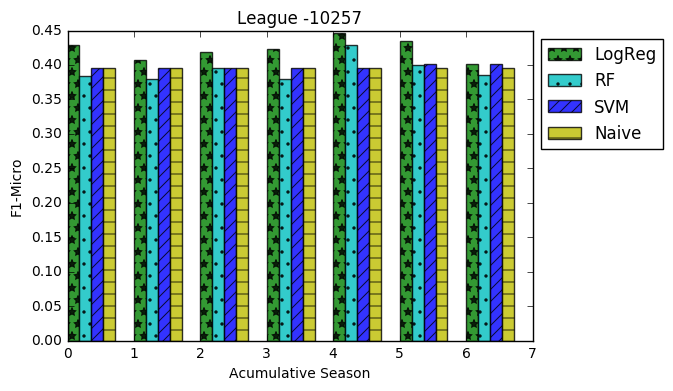

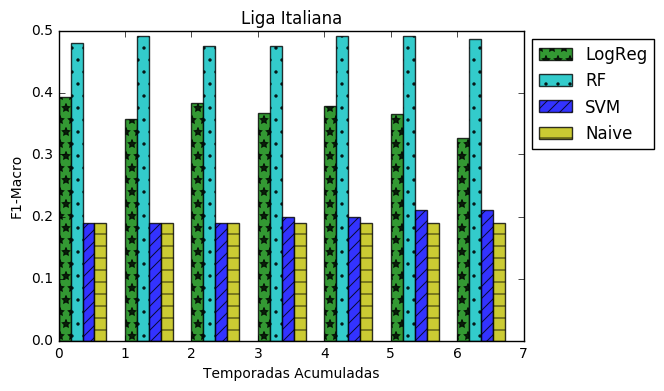

----F - K2----
League - 21518
0-1
500
1-2
1000
2-3
100
3-4
100
4-5
500
5-6
100
LogReg
[0.27567567567567569, 0.40259740259740256, 0.35999999999999999, 0.34615384615384615, 0.31168831168831168, 0.32484076433121017]
---
RF
[0.36649353469499063, 0.31212121212121208, 0.2729369941759322, 0.36959064327485375, 0.38858146684233641, 0.39258028792912514]
---
SVM
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.38311688311688313, 0.46496815286624205]
---
Naive
[0.55675675675675673, 0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


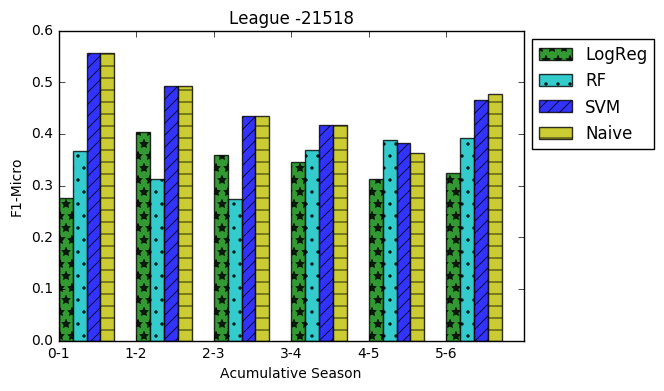

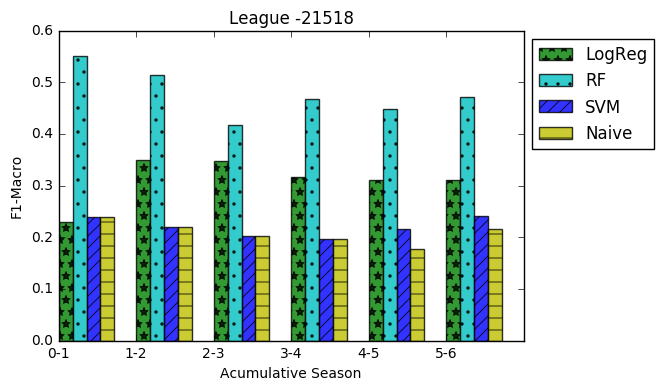

League - 1729
0-1
100
1-2
50
2-3
100
3-4
3000
4-5
100
5-6
100
LogReg
[0.35714285714285715, 0.35502958579881655, 0.42528735632183906, 0.33950617283950618, 0.42261904761904762, 0.38636363636363635]
---
RF
[0.37861742716111646, 0.34476101339880794, 0.39137075584806508, 0.38181240908139452, 0.39098300073909825, 0.33412339294692234]
---
SVM
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.42857142857142855, 0.42613636363636365]
---
Naive
[0.46153846153846156, 0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


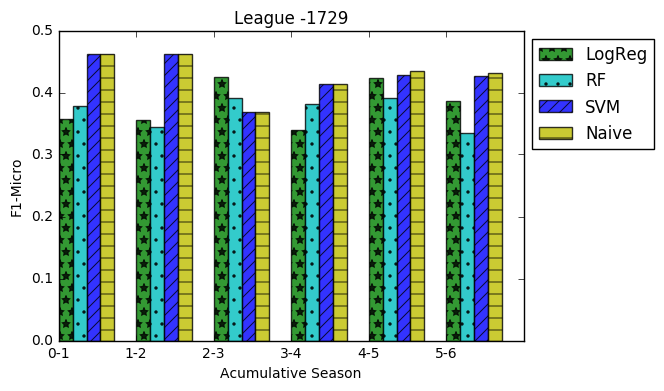

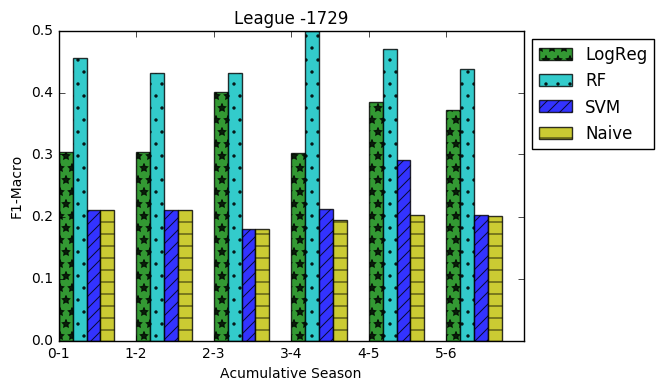

League - 4769
0-1
500
1-2
2000
2-3
1000
3-4
100
4-5
100
5-6
500
LogReg
[0.37948717948717947, 0.40588235294117647, 0.35195530726256985, 0.3764044943820225, 0.36931818181818182, 0.46706586826347307]
---
RF
[0.36233302722358457, 0.35172044450394963, 0.376376042322139, 0.36370637955856244, 0.38434627005471417, 0.37646088049564153]
---
SVM
[0.3948717948717948, 0.5, 0.46927374301675978, 0.42134831460674149, 0.46022727272727276, 0.43712574850299402]
---
Naive
[0.38974358974358975, 0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


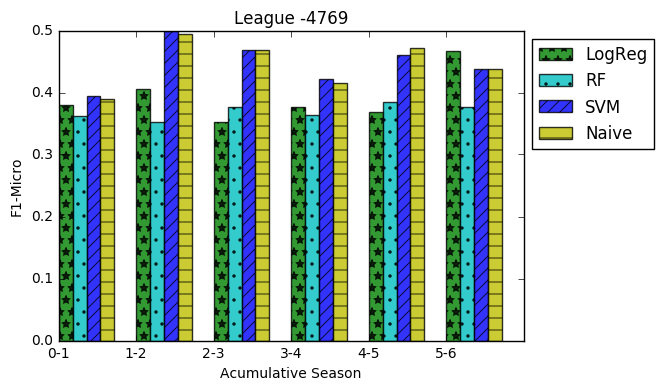

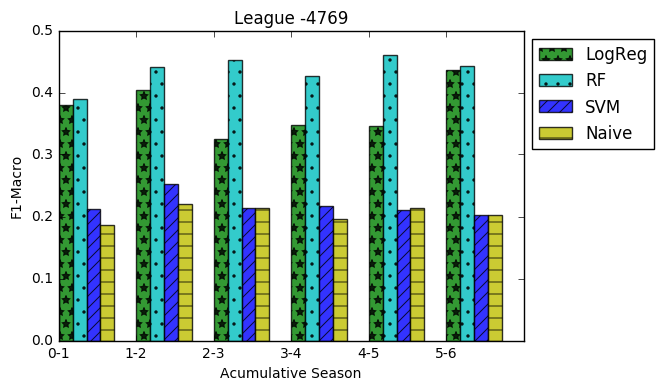

League - 10257
0-1
50
1-2
50
2-3
500
3-4
100
4-5
50
5-6
100
LogReg
[0.36363636363636365, 0.40259740259740256, 0.38953488372093026, 0.38596491228070173, 0.34682080924855491, 0.33333333333333331]
---
RF
[0.37361400832903424, 0.40165484633569742, 0.33416616769544255, 0.40066649712844632, 0.32507801289471261, 0.3476206063440106]
---
SVM
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.49090909090909091, 0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


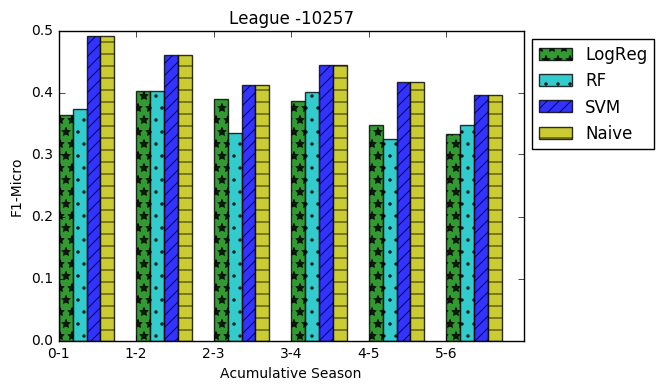

----F - K3----
League - 21518
0-2
50
1-3
1000
2-4
2000
3-5
2000
4-6
50
LogReg
[0.38961038961038963, 0.40571428571428569, 0.37179487179487186, 0.31818181818181818, 0.3503184713375796]
---
RF
[0.33550893550893551, 0.27460241052231038, 0.30579730997322024, 0.38955588448489059, 0.39851097178683387]
---
SVM
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.37662337662337658, 0.46496815286624205]
---
Naive
[0.4935064935064935, 0.43428571428571427, 0.41666666666666669, 0.36363636363636365, 0.47770700636942676]


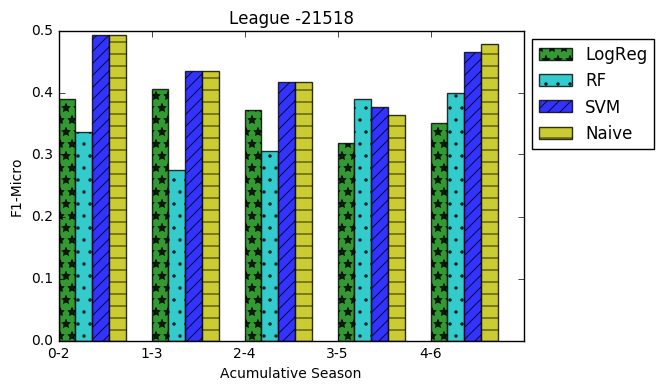

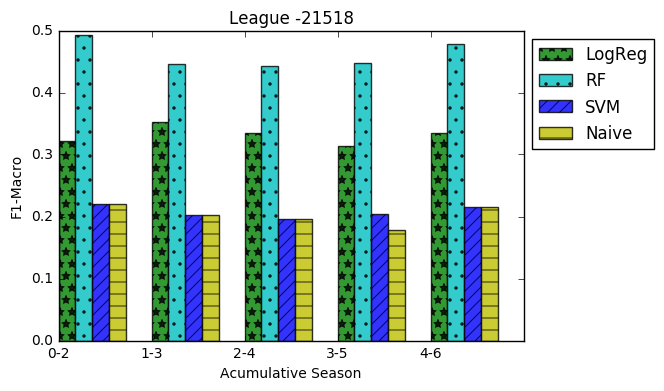

League - 1729
0-2
1000
1-3
500
2-4
1000
3-5
50
4-6
100
LogReg
[0.36686390532544377, 0.40229885057471265, 0.33950617283950618, 0.48809523809523808, 0.36931818181818182]
---
RF
[0.36760307330467795, 0.33131516340074735, 0.47272667521114725, 0.4199481910325284, 0.37449233420200917]
---
SVM
[0.46153846153846156, 0.36781609195402298, 0.40740740740740738, 0.41666666666666669, 0.43181818181818182]
---
Naive
[0.46153846153846156, 0.36781609195402298, 0.41358024691358025, 0.43452380952380953, 0.43181818181818182]


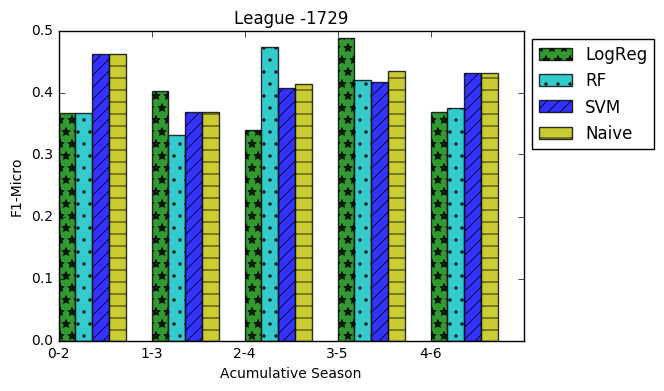

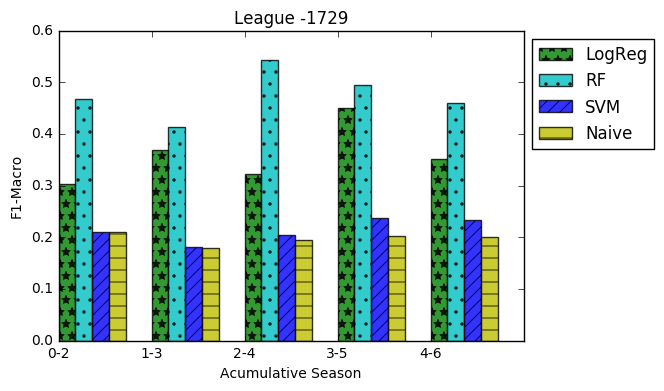

League - 4769
0-2
2000
1-3
100
2-4
100
3-5
1000
4-6
100
LogReg
[0.36470588235294116, 0.39664804469273746, 0.33707865168539325, 0.39204545454545459, 0.45508982035928142]
---
RF
[0.37489978415047792, 0.3710563915488676, 0.32959549411162314, 0.36421669155261477, 0.35015468863741644]
---
SVM
[0.50588235294117645, 0.46927374301675978, 0.4157303370786517, 0.45454545454545453, 0.43113772455089822]
---
Naive
[0.49411764705882355, 0.46927374301675978, 0.4157303370786517, 0.47159090909090912, 0.43712574850299402]


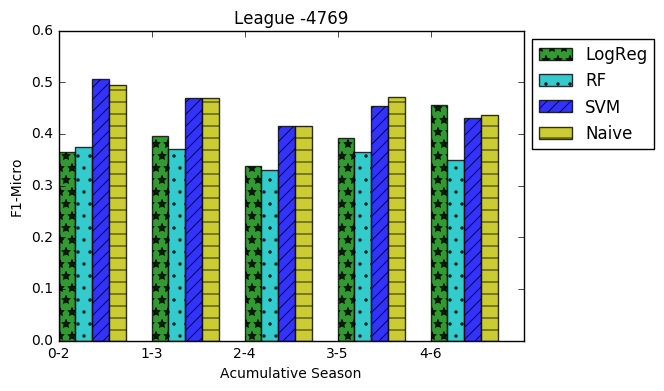

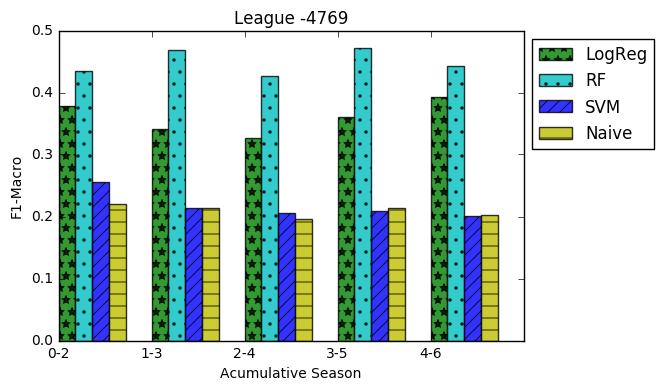

League - 10257
0-2
2000
1-3
3000
2-4
50
3-5
50
4-6
500
LogReg
[0.40909090909090912, 0.38953488372093026, 0.39766081871345027, 0.41040462427745666, 0.33898305084745761]
---
RF
[0.38006591110039389, 0.36509161908029641, 0.4308217801888688, 0.34355095231158339, 0.41707250489533587]
---
SVM
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]
---
Naive
[0.46103896103896103, 0.41279069767441862, 0.44444444444444442, 0.41618497109826591, 0.39548022598870058]


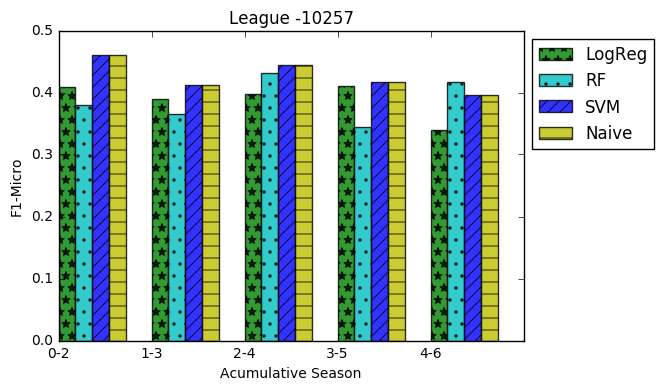

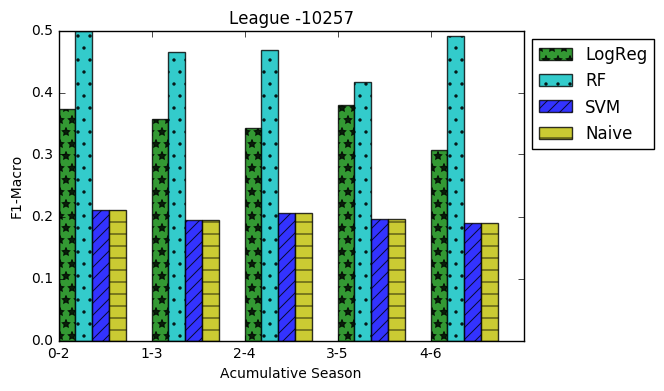

In [38]:

#Favoritos
print "----F - ACC----"
f_rf_f1_ac = accumulative_f1(f_data,leagues)
print "----F - K2----"
f_rf_f1_k2 = k2_f1(f_data,leagues)
print "----F - K3----"
f_rf_f1_k3 = k3_f1(f_data,leagues)


----EQ - ACC----
League - 21518
50
LogReg
[0.3902439024390244, 0.3048780487804878, 0.32926829268292684, 0.37804878048780494, 0.34146341463414637, 0.40243902439024387, 0.40243902439024387]
---
RF
[0.33049524620405846, 0.32196267457669014, 0.40615520728008087, 0.3196846513919685, 0.30758075148319047, 0.27117797077474498, 0.36861337716322112]
---
SVM
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]
---
Naive
[0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583, 0.35365853658536583]


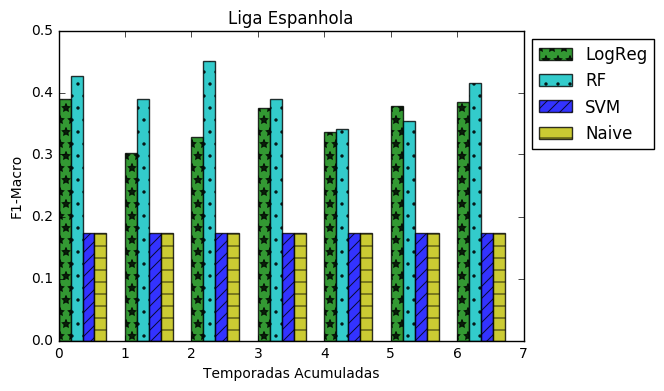

League - 1729
1000
LogReg
[0.30392156862745096, 0.26470588235294118, 0.38235294117647062, 0.36274509803921567, 0.39215686274509803, 0.39215686274509803, 0.40196078431372545]
---
RF
[0.27022739419265751, 0.28402611880872747, 0.24832479306267244, 0.28289164041852216, 0.33797023653661512, 0.37328600081803881, 0.37469644176961253]
---
SVM
[0.29411764705882354, 0.28431372549019607, 0.30392156862745096, 0.29411764705882354, 0.30392156862745096, 0.30392156862745096, 0.27450980392156865]
---
Naive
[0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096, 0.30392156862745096]


League - 4769
50
LogReg
[0.34482758620689657, 0.27586206896551724, 0.29310344827586204, 0.35344827586206895, 0.35344827586206895, 0.35344827586206895, 0.31896551724137934]
---
RF
[0.33544260733483028, 0.28238636363636366, 0.2944054334062392, 0.31005577712270971, 0.32573743850041187, 0.27234744626048973, 0.31642301904384446]
---
SVM
[0.29310344827586204, 0.31896551724137934, 0.31034482758620691, 0.31034482758620691, 0.31034482758620691, 0.34482758620689657, 0.31896551724137934]
---
Naive
[0.29310344827586204, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657, 0.34482758620689657]


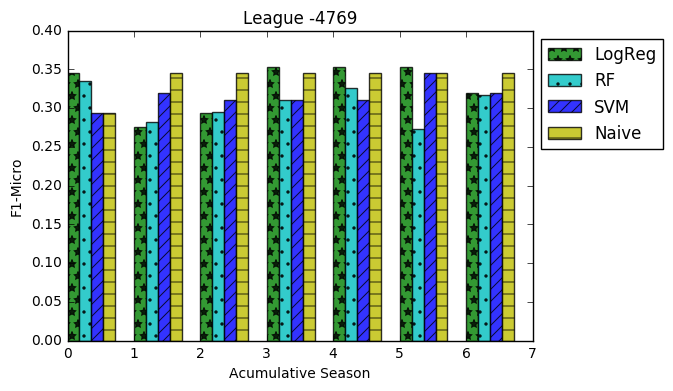

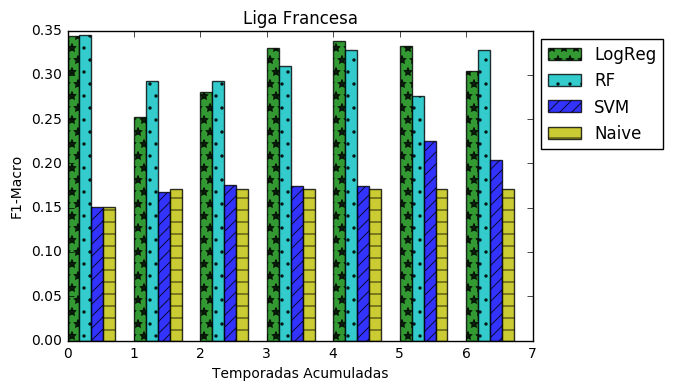

League - 10257
2000
LogReg
[0.38823529411764707, 0.37647058823529406, 0.44705882352941179, 0.40000000000000008, 0.36470588235294116, 0.40000000000000008, 0.42352941176470588]
---
RF
[0.35396241830065361, 0.3231457621701524, 0.34341736694677866, 0.41499023851965022, 0.44259259259259259, 0.44433526497018566, 0.41549352699178482]
---
SVM
[0.40000000000000008, 0.40000000000000008, 0.38823529411764707, 0.40000000000000008, 0.38823529411764707, 0.37647058823529406, 0.36470588235294116]
---
Naive
[0.40000000000000008, 0.40000000000000008, 0.40000000000000008, 0.40000000000000008, 0.40000000000000008, 0.40000000000000008, 0.40000000000000008]


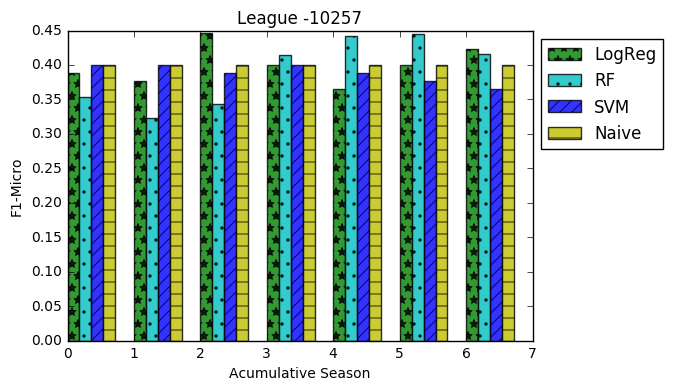

----EQ - K2----
League - 21518
0-1
50
1-2
500
2-3
1000
3-4
100
4-5
3000
5-6
100
LogReg
[0.3188405797101449, 0.40229885057471265, 0.31428571428571428, 0.37878787878787878, 0.35897435897435898, 0.32926829268292684]
---
RF
[0.28976786116745551, 0.3516010939946031, 0.30502927847182004, 0.36601406256578678, 0.31187739463601533, 0.41266456831488812]
---
SVM
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.34146341463414637]
---
Naive
[0.43478260869565216, 0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


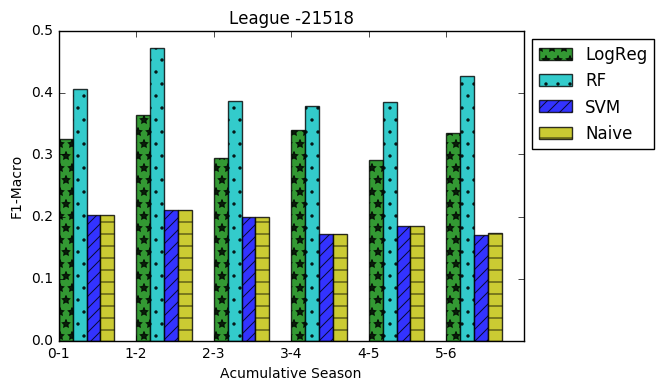

League - 1729
0-1
1000
1-2
50
2-3
500
3-4
3000
4-5
50
5-6
2000
LogReg
[0.35365853658536583, 0.41891891891891891, 0.3125, 0.3595505617977528, 0.32258064516129031, 0.33333333333333331]
---
RF
[0.31180241327300151, 0.41903064256005429, 0.43511710239651413, 0.41652542372881357, 0.31340618002138226, 0.36263186984836465]
---
SVM
[0.40243902439024387, 0.28378378378378377, 0.3125, 0.3146067415730337, 0.37634408602150538, 0.29411764705882354]
---
Naive
[0.40243902439024387, 0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


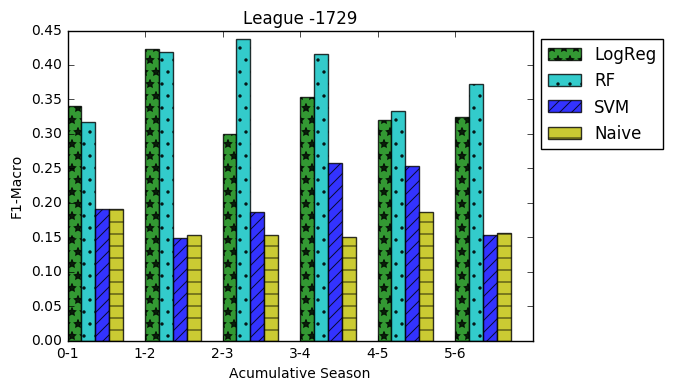

League - 4769
0-1
500
1-2
100
2-3
50
3-4
50
4-5
50
5-6
100
LogReg
[0.30434782608695654, 0.33898305084745761, 0.29702970297029702, 0.30107526881720431, 0.31132075471698112, 0.29310344827586204]
---
RF
[0.31190281190281188, 0.32810489060489062, 0.28894230769230766, 0.39799635701275049, 0.38149134359717579, 0.33080874221523776]
---
SVM
[0.35869565217391303, 0.40677966101694923, 0.32673267326732675, 0.33333333333333331, 0.32075471698113206, 0.36206896551724144]
---
Naive
[0.38043478260869568, 0.40677966101694923, 0.33663366336633666, 0.34408602150537637, 0.330188679245283, 0.34482758620689657]


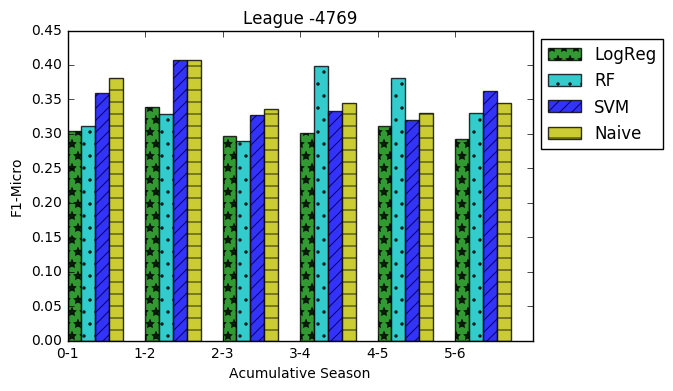

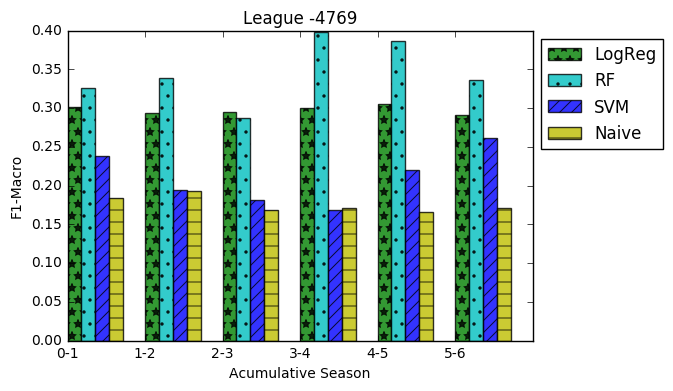

League - 10257
0-1
50
1-2
2000
2-3
50
3-4
100
4-5
50
5-6
50
LogReg
[0.3235294117647059, 0.3473684210526316, 0.40659340659340659, 0.38095238095238093, 0.41758241758241765, 0.36470588235294116]
---
RF
[0.31447318770701432, 0.40661938534278957, 0.36709512058008026, 0.33159957186706651, 0.35629290617848969, 0.34225150577351843]
---
SVM
[0.33333333333333331, 0.40000000000000008, 0.39560439560439559, 0.35714285714285715, 0.27472527472527475, 0.29411764705882354]
---
Naive
[0.34313725490196079, 0.41052631578947374, 0.41758241758241765, 0.35714285714285715, 0.2967032967032967, 0.30588235294117649]


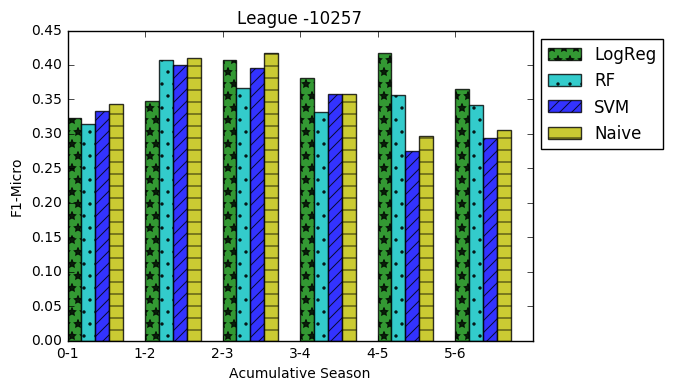

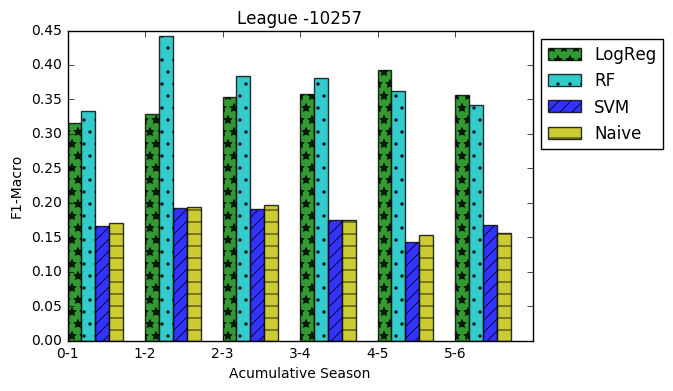

----EQ - K3----
League - 21518
0-2
1000
1-3
100
2-4
1000
3-5
50
4-6
100
LogReg
[0.33333333333333331, 0.38571428571428573, 0.36363636363636365, 0.35897435897435898, 0.37804878048780494]
---
RF
[0.29453262786596118, 0.36944444444444446, 0.28835978835978837, 0.28155641021138095, 0.40386386662982404]
---
SVM
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]
---
Naive
[0.45977011494252873, 0.42857142857142855, 0.34848484848484851, 0.38461538461538464, 0.35365853658536583]


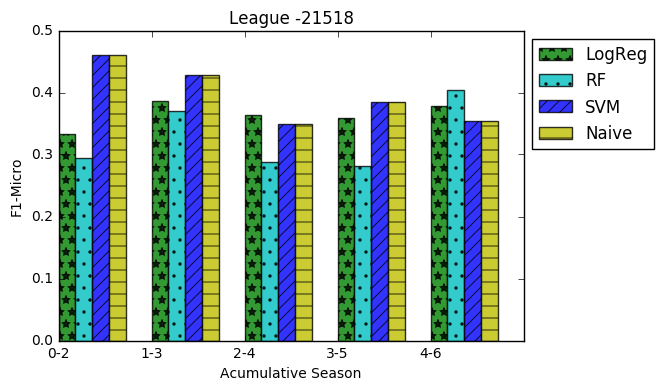

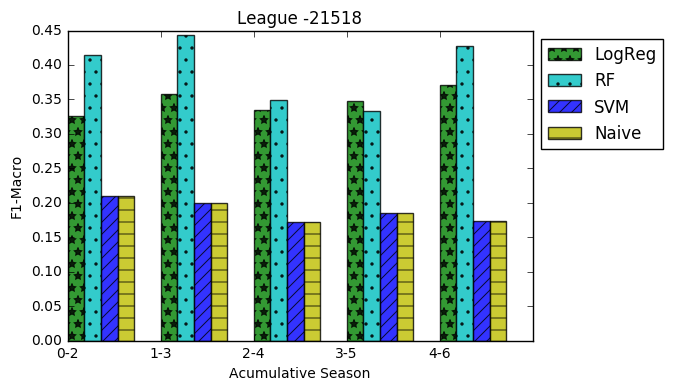

League - 1729
0-2
50
1-3
100
2-4
100
3-5
3000
4-6
1000
LogReg
[0.35135135135135137, 0.29999999999999999, 0.3820224719101124, 0.37634408602150538, 0.33333333333333331]
---
RF
[0.35112223612849397, 0.41440388777501891, 0.3806963645673323, 0.32666666666666666, 0.45622710622710622]
---
SVM
[0.28378378378378377, 0.29999999999999999, 0.29213483146067415, 0.37634408602150538, 0.3235294117647059]
---
Naive
[0.29729729729729731, 0.29999999999999999, 0.29213483146067415, 0.38709677419354838, 0.30392156862745096]


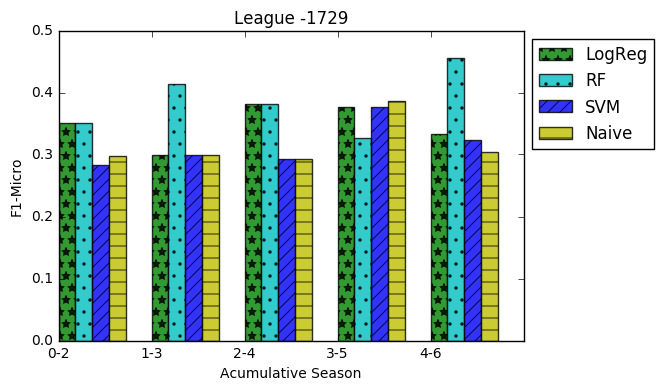

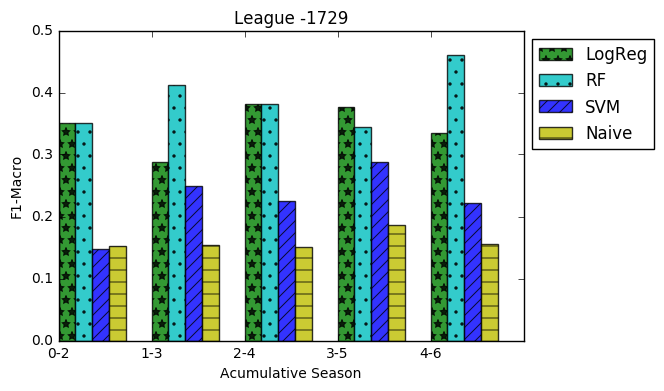

League - 4769
0-2
1000
1-3
500
2-4
50
3-5
500
4-6
100
LogReg
[0.33898305084745761, 0.27722772277227725, 0.29032258064516131, 0.30188679245283018, 0.31034482758620691]
---
RF
[0.38095197528340036, 0.31932129173508489, 0.36428571428571427, 0.35433649115076743, 0.3543423367712773]
---
SVM
[0.40677966101694923, 0.32673267326732675, 0.32258064516129031, 0.39622641509433965, 0.35344827586206895]
---
Naive
[0.40677966101694923, 0.33663366336633666, 0.34408602150537637, 0.38679245283018876, 0.34482758620689657]


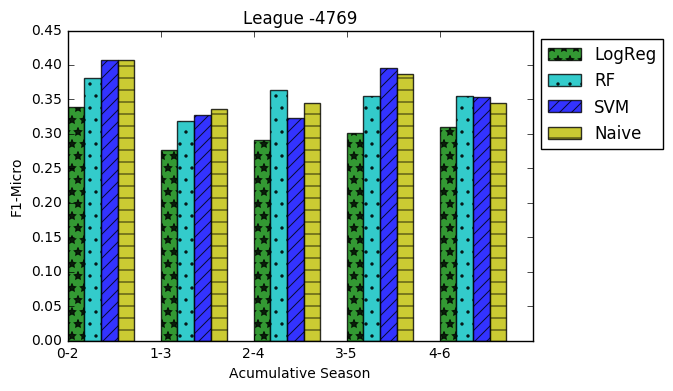

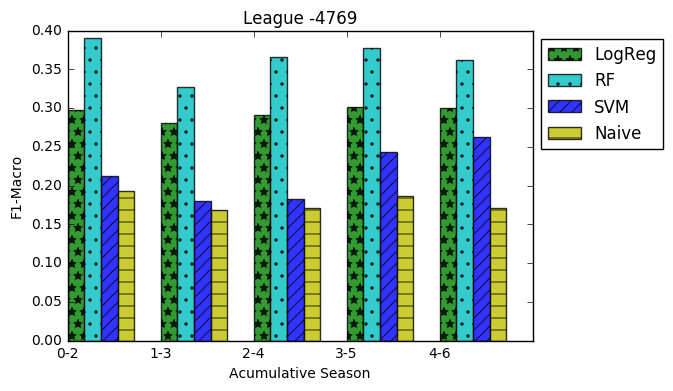

League - 10257
0-2
1000
1-3
100
2-4
100
3-5
500
4-6
1000
LogReg
[0.32631578947368423, 0.39560439560439559, 0.42857142857142855, 0.30769230769230771, 0.3411764705882353]
---
RF
[0.41987179487179488, 0.38414423740510695, 0.42241448369782902, 0.39839816933638444, 0.38401253918495293]
---
SVM
[0.41052631578947374, 0.41758241758241765, 0.35714285714285715, 0.2857142857142857, 0.38823529411764707]
---
Naive
[0.41052631578947374, 0.41758241758241765, 0.35714285714285715, 0.2967032967032967, 0.40000000000000008]


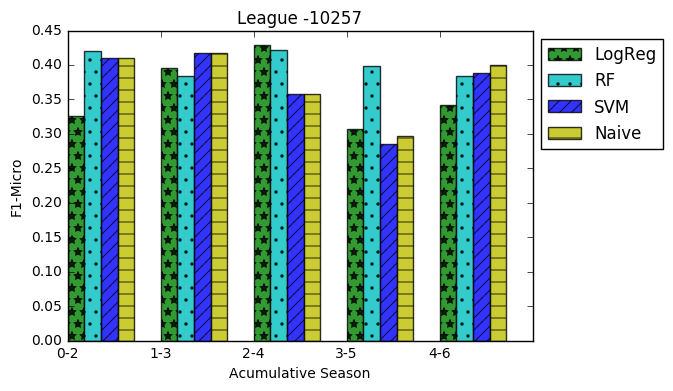

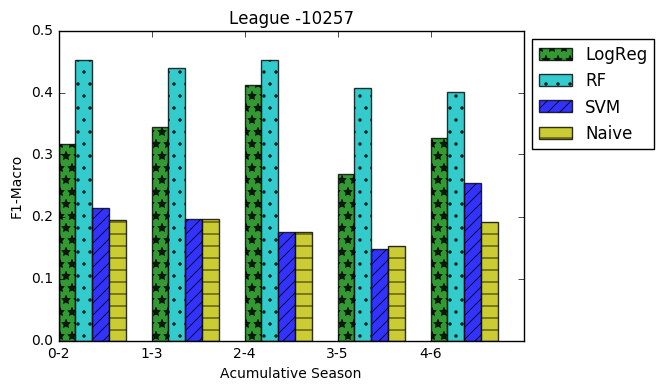

In [39]:
#Iguais
print "----EQ - ACC----"
eq_rf_f1_ac = accumulative_f1(eq_data,leagues)
print "----EQ - K2----"
eq_rf_f1_k2 = k2_f1(eq_data,leagues)
print "----EQ - K3----"
eq_rf_f1_k3 = k3_f1(eq_data,leagues)

In [40]:
#Salvando rf's em arquivo

import pickle

#sf
f = open('sf_rf_acc_ac.pckl', 'wb')
pickle.dump(sf_rf_acc_ac, f)
f.close()

f = open('sf_rf_acc_k2.pckl', 'wb')
pickle.dump(sf_rf_acc_k2, f)
f.close()

f = open('sf_rf_acc_k3.pckl', 'wb')
pickle.dump(sf_rf_acc_k3, f)
f.close()

f = open('sf_rf_f1_ac.pckl', 'wb')
pickle.dump(sf_rf_f1_ac, f)
f.close()

f = open('sf_rf_f1_k2.pckl', 'wb')
pickle.dump(sf_rf_f1_k2, f)
f.close()

f = open('sf_rf_f1_k3.pckl', 'wb')
pickle.dump(sf_rf_f1_k3, f)
f.close()


#Favorito

f = open('f_rf_acc_ac.pckl', 'wb')
pickle.dump(f_rf_acc_ac, f)
f.close()

f = open('f_rf_acc_k2.pckl', 'wb')
pickle.dump(f_rf_acc_k2, f)
f.close()

f = open('f_rf_acc_k3.pckl', 'wb')
pickle.dump(f_rf_acc_k3, f)
f.close()

f = open('f_rf_f1_ac.pckl', 'wb')
pickle.dump(f_rf_f1_ac, f)
f.close()

f = open('f_rf_f1_k2.pckl', 'wb')
pickle.dump(f_rf_f1_k2, f)
f.close()

f = open('f_rf_f1_k3.pckl', 'wb')
pickle.dump(f_rf_f1_k3, f)
f.close()


#Igual

f = open('eq_rf_acc_ac.pckl', 'wb')
pickle.dump(eq_rf_acc_ac, f)
f.close()

f = open('eq_rf_acc_k2.pckl', 'wb')
pickle.dump(eq_rf_acc_k2, f)
f.close()

f = open('eq_rf_acc_k3.pckl', 'wb')
pickle.dump(eq_rf_acc_k3, f)
f.close()

f = open('eq_rf_f1_ac.pckl', 'wb')
pickle.dump(eq_rf_f1_ac, f)
f.close()

f = open('eq_rf_f1_k2.pckl', 'wb')
pickle.dump(eq_rf_f1_k2, f)
f.close()

f = open('eq_rf_f1_k3.pckl', 'wb')
pickle.dump(eq_rf_f1_k3, f)
f.close()

#Carregar arquivo
#f = open('store.pckl', 'rb')
#obj = pickle.load(f)
#f.close()

----AL - ACC----
League - 21518


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:55: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1000
LogReg
[0.41818181818181815, 0.42424242424242425, 0.49090909090909091, 0.48787878787878786, 0.50303030303030305, 0.50909090909090904, 0.49393939393939396]
---
RF
[0.54848484848484846, 0.54848484848484846, 0.54848484848484846, 0.56060606060606055, 0.55151515151515151, 0.55151515151515151, 0.55757575757575761]
---
SVM
[0.49696969696969695, 0.49696969696969695, 0.49393939393939396, 0.49393939393939396, 0.49696969696969695, 0.49393939393939396, 0.49393939393939396]
---
Naive
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


League - 1729
2000
LogReg
[0.41212121212121211, 0.43636363636363634, 0.42727272727272725, 0.43333333333333335, 0.43939393939393939, 0.45757575757575758, 0.49090909090909091]
---
RF
[0.44545454545454544, 0.43333333333333335, 0.46060606060606063, 0.45454545454545453, 0.49090909090909091, 0.48484848484848486, 0.48484848484848486]
---
SVM
[0.42727272727272725, 0.42727272727272725, 0.4303030303030303, 0.42727272727272725, 0.42727272727272725, 0.41818181818181815, 0.41818181818181815]
---
Naive
[0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725]


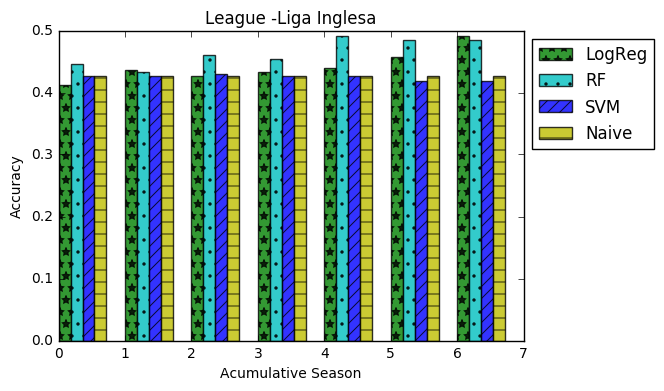

League - 4769
3000
LogReg
[0.34954407294832829, 0.36170212765957449, 0.41337386018237082, 0.42249240121580545, 0.42553191489361702, 0.43161094224924013, 0.44984802431610943]
---
RF
[0.44072948328267475, 0.45288753799392095, 0.45288753799392095, 0.47416413373860183, 0.48936170212765956, 0.48936170212765956, 0.49848024316109424]
---
SVM
[0.41945288753799392, 0.42553191489361702, 0.42553191489361702, 0.42857142857142855, 0.42857142857142855, 0.42553191489361702, 0.42857142857142855]
---
Naive
[0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


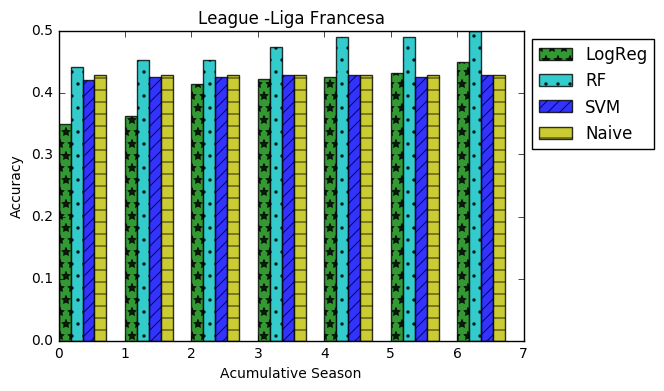

League - 10257
1000
LogReg
[0.46060606060606063, 0.50303030303030305, 0.48484848484848486, 0.47575757575757577, 0.5, 0.50303030303030305, 0.48181818181818181]
---
RF
[0.51212121212121209, 0.53636363636363638, 0.52727272727272723, 0.53636363636363638, 0.54242424242424248, 0.54545454545454541, 0.53636363636363638]
---
SVM
[0.45454545454545453, 0.45454545454545453, 0.45757575757575758, 0.45151515151515154, 0.45151515151515154, 0.44545454545454544, 0.46060606060606063]
---
Naive
[0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453]


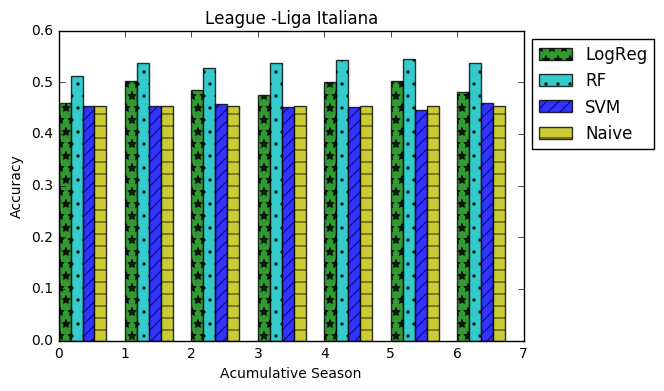

----AL - K2----
League - 21518
0-1
3000
1-2
1000
2-3
1000
3-4
50
4-5
500
5-6
1000
LogReg
[0.44848484848484849, 0.50909090909090904, 0.41818181818181815, 0.48787878787878786, 0.45454545454545453, 0.44545454545454544]
---
RF
[0.58484848484848484, 0.56666666666666665, 0.53636363636363638, 0.54242424242424248, 0.56666666666666665, 0.52727272727272723]
---
SVM
[0.53636363636363638, 0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]
---
Naive
[0.53636363636363638, 0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]


League - 1729
0-1
3000
1-2
500
2-3
500
3-4
2000
4-5
50
5-6
1000
LogReg
[0.4212121212121212, 0.37575757575757573, 0.49090909090909091, 0.46363636363636362, 0.46060606060606063, 0.4303030303030303]
---
RF
[0.48181818181818181, 0.47575757575757577, 0.50303030303030305, 0.59999999999999998, 0.54545454545454541, 0.45454545454545453]
---
SVM
[0.47575757575757577, 0.45757575757575758, 0.43333333333333335, 0.47272727272727272, 0.47272727272727272, 0.42727272727272725]
---
Naive
[0.47575757575757577, 0.45757575757575758, 0.43333333333333335, 0.47575757575757577, 0.47878787878787876, 0.42727272727272725]


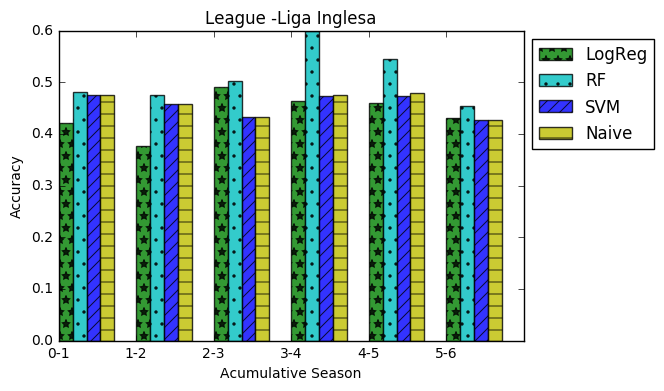

League - 4769
0-1
2000
1-2
500
2-3
100
3-4
1000
4-5
1000
5-6
100
LogReg
[0.43465045592705165, 0.37575757575757573, 0.43939393939393939, 0.43333333333333335, 0.39393939393939392, 0.44072948328267475]
---
RF
[0.44376899696048633, 0.47272727272727272, 0.45757575757575758, 0.47575757575757577, 0.50909090909090904, 0.47112462006079026]
---
SVM
[0.42249240121580545, 0.48484848484848486, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42249240121580545]
---
Naive
[0.42249240121580545, 0.49090909090909091, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42857142857142855]


League - 10257
0-1
100
1-2
3000
2-3
1000
3-4
500
4-5
100
5-6
100
LogReg
[0.44954128440366975, 0.43934426229508194, 0.45288753799392095, 0.5060606060606061, 0.42249240121580545, 0.48181818181818181]
---
RF
[0.52905198776758411, 0.50819672131147542, 0.54103343465045595, 0.52424242424242429, 0.45896656534954405, 0.48484848484848486]
---
SVM
[0.47400611620795108, 0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.40729483282674772, 0.45454545454545453]
---
Naive
[0.47400611620795108, 0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.41033434650455924, 0.45454545454545453]


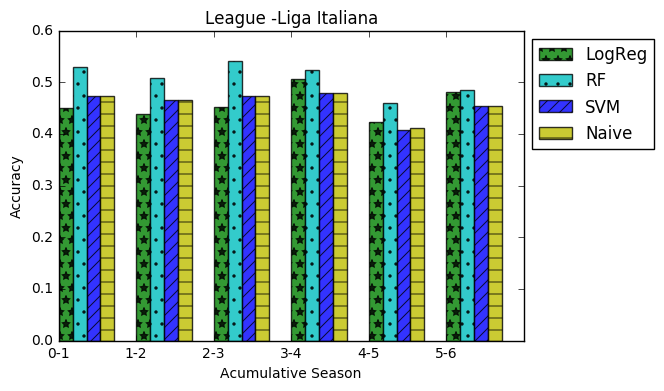

----AL - K3----
League - 21518
0-2
1000
1-3
500
2-4
2000
3-5
3000
4-6
50
LogReg
[0.48787878787878786, 0.46666666666666667, 0.46666666666666667, 0.50303030303030305, 0.47272727272727272]
---
RF
[0.55757575757575761, 0.54545454545454541, 0.53939393939393943, 0.58181818181818179, 0.54242424242424248]
---
SVM
[0.5, 0.49393939393939396, 0.47878787878787876, 0.45757575757575758, 0.5]
---
Naive
[0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]


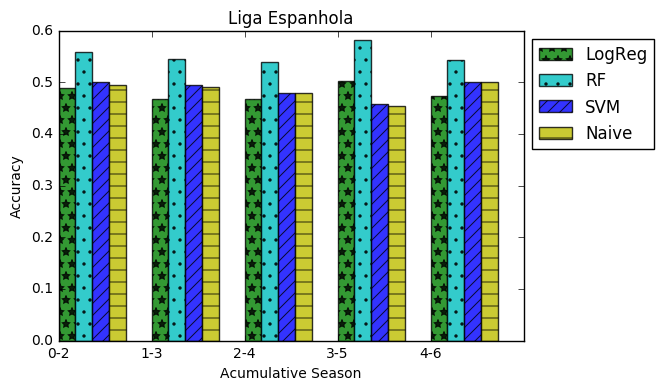

League - 1729
0-2
100
1-3
100
2-4
500
3-5
500
4-6
50
LogReg
[0.4303030303030303, 0.46969696969696972, 0.46363636363636362, 0.51818181818181819, 0.41818181818181815]
---
RF
[0.48181818181818181, 0.50303030303030305, 0.58787878787878789, 0.5757575757575758, 0.49696969696969695]
---
SVM
[0.45454545454545453, 0.43333333333333335, 0.47575757575757577, 0.46363636363636362, 0.43333333333333335]
---
Naive
[0.45757575757575758, 0.43333333333333335, 0.47575757575757577, 0.47878787878787876, 0.42727272727272725]


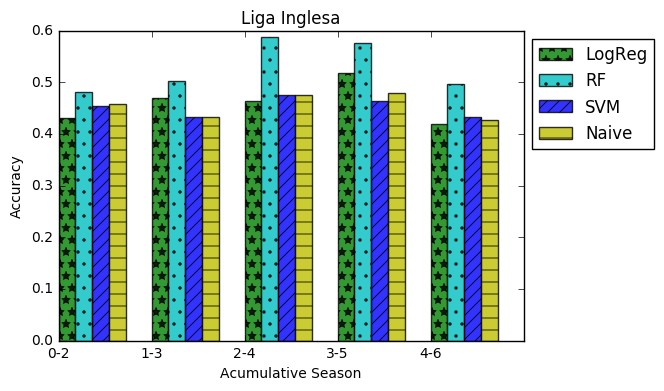

League - 4769
0-2
2000
1-3
1000
2-4
50
3-5
3000
4-6
500
LogReg
[0.42424242424242425, 0.43636363636363634, 0.45757575757575758, 0.44848484848484849, 0.46808510638297873]
---
RF
[0.5, 0.48181818181818181, 0.50303030303030305, 0.50909090909090904, 0.47416413373860183]
---
SVM
[0.48787878787878786, 0.44545454545454544, 0.43333333333333335, 0.47878787878787876, 0.42249240121580545]
---
Naive
[0.49090909090909091, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42857142857142855]


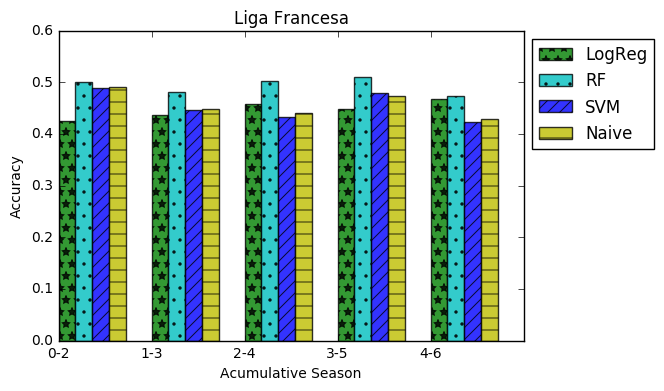

League - 10257
0-2
500
1-3
2000
2-4
100
3-5
2000
4-6
2000
LogReg
[0.46557377049180326, 0.48328267477203646, 0.49393939393939396, 0.45288753799392095, 0.47878787878787876]
---
RF
[0.5311475409836065, 0.55927051671732519, 0.54242424242424248, 0.47720364741641336, 0.53939393939393943]
---
SVM
[0.46885245901639344, 0.47416413373860183, 0.47878787878787876, 0.40729483282674772, 0.45151515151515154]
---
Naive
[0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.41033434650455924, 0.45454545454545453]


----AL - f1 ACC----
League - 21518
500
LogReg
[0.41818181818181815, 0.42424242424242431, 0.49090909090909091, 0.48787878787878786, 0.50303030303030305, 0.50909090909090904, 0.49393939393939396]
---
RF
[0.39644187918960422, 0.38516686127918559, 0.38577163600028513, 0.39898016401710529, 0.41632364402991334, 0.43222860869919694, 0.39367082416238697]
---
SVM
[0.49696969696969695, 0.49696969696969695, 0.49393939393939396, 0.49393939393939396, 0.49696969696969695, 0.49393939393939396, 0.49393939393939396]
---
Naive
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


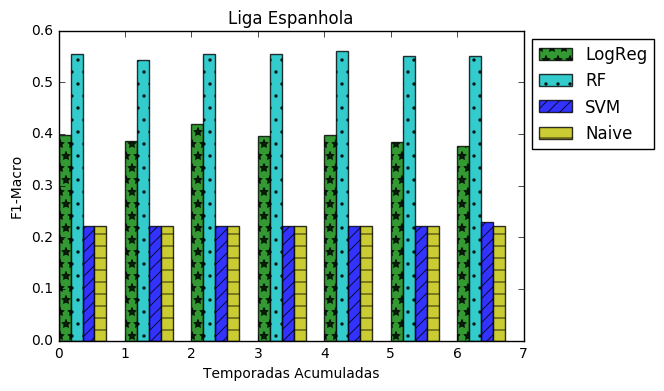

League - 1729
100
LogReg
[0.41212121212121211, 0.43636363636363634, 0.42727272727272725, 0.43333333333333335, 0.43939393939393939, 0.45757575757575752, 0.49090909090909091]
---
RF
[0.39616490590199177, 0.37953965436308607, 0.36880509498623243, 0.37839878938427063, 0.40843246863478422, 0.40008241758241764, 0.40397856627241929]
---
SVM
[0.42727272727272725, 0.42727272727272725, 0.43030303030303024, 0.42727272727272725, 0.42727272727272725, 0.41818181818181815, 0.41818181818181815]
---
Naive
[0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725, 0.42727272727272725]


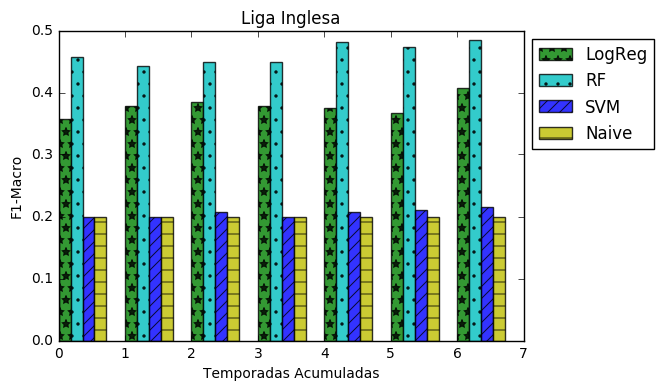

League - 4769
2000
LogReg
[0.34954407294832829, 0.36170212765957449, 0.41337386018237082, 0.42249240121580545, 0.42553191489361697, 0.43161094224924013, 0.44984802431610943]
---
RF
[0.40102991541269817, 0.38697378587671921, 0.39565516746044133, 0.39608217869087436, 0.40515067038364522, 0.46480818850104672, 0.41160256969816134]
---
SVM
[0.41945288753799392, 0.42553191489361697, 0.42553191489361697, 0.42857142857142855, 0.42857142857142855, 0.42553191489361697, 0.42857142857142855]
---
Naive
[0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855, 0.42857142857142855]


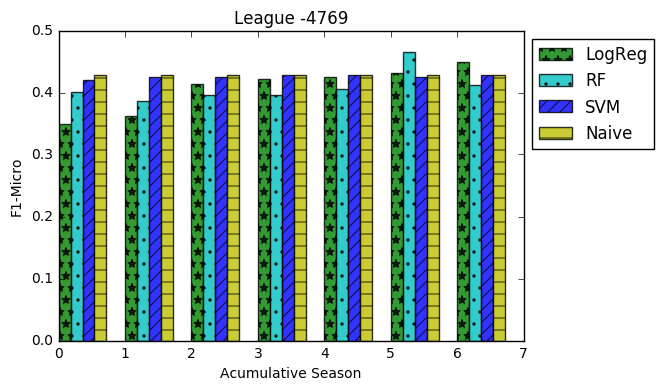

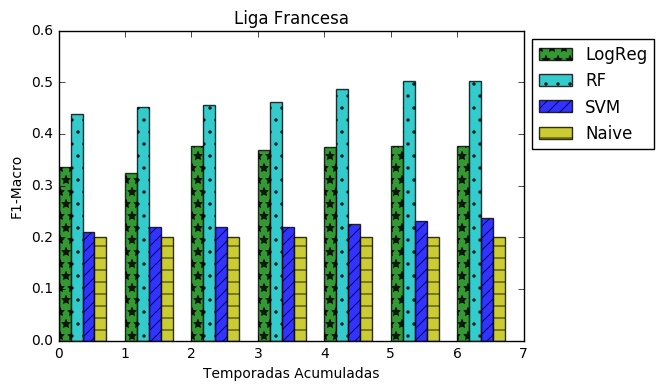

League - 10257
100
LogReg
[0.46060606060606063, 0.50303030303030305, 0.48484848484848486, 0.47575757575757577, 0.5, 0.50303030303030305, 0.48181818181818181]
---
RF
[0.42838776464302408, 0.45511937557392096, 0.42250209067585115, 0.43077376134147577, 0.45588812415034646, 0.4343767849270696, 0.44657015858563104]
---
SVM
[0.45454545454545453, 0.45454545454545453, 0.45757575757575752, 0.45151515151515154, 0.45151515151515154, 0.44545454545454544, 0.46060606060606063]
---
Naive
[0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453]


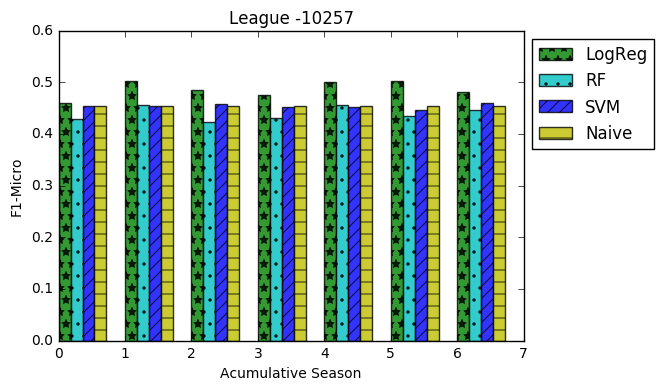

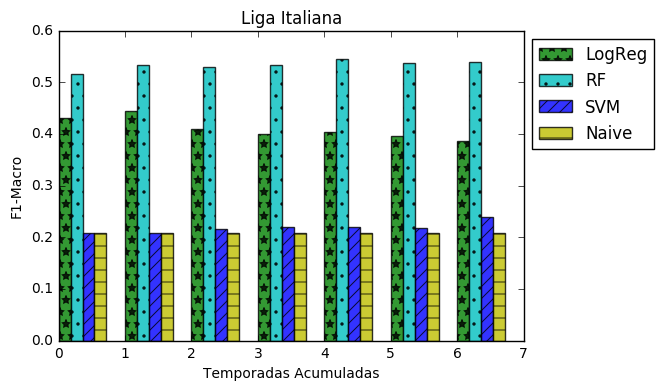

----AL - f1 K2----


NameError: name 'k2_f2' is not defined

In [41]:
#Função que vai chamar sem usar a separação por filtro
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage','B365H',
       'B365D', 'B365A']
print "----AL - ACC----"
al_rf_acc_ac = accumulative_acc(data,leagues)
print "----AL - K2----"
al_rf_acc_k2 = k2_acc(data,leagues)
print "----AL - K3----"
al_rf_acc_k3 = k3_acc(data,leagues)
print "----AL - f1 ACC----"
al_rf_f1_ac = accumulative_f1(data,leagues)


----AL - f1 K2----
League - 21518
0-1
50
1-2
50
2-3
50
3-4
100
4-5
100
5-6
50
LogReg
[0.44848484848484849, 0.50909090909090904, 0.41818181818181815, 0.48787878787878786, 0.45454545454545453, 0.44545454545454544]
---
RF
[0.43473397900302491, 0.41166342911762738, 0.38798401748708339, 0.40135615909967554, 0.44061463969526199, 0.4438484279057156]
---
SVM
[0.53636363636363638, 0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]
---
Naive
[0.53636363636363638, 0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]


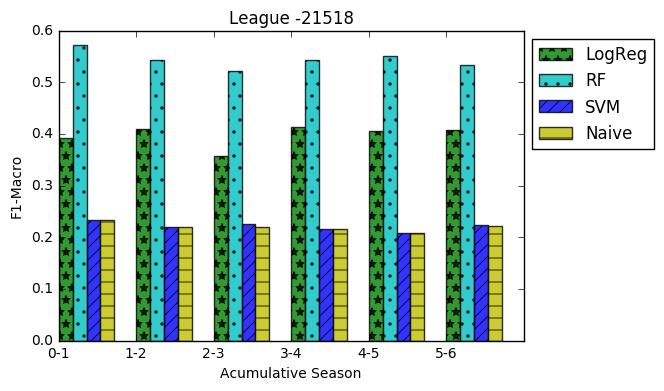

League - 1729
0-1
500
1-2
1000
2-3
50
3-4
1000
4-5
500
5-6
50
LogReg
[0.4212121212121212, 0.37575757575757579, 0.49090909090909091, 0.46363636363636362, 0.46060606060606063, 0.43030303030303024]
---
RF
[0.38174704344663252, 0.36736416098714358, 0.4326926021985959, 0.50605214674838506, 0.4197411879365423, 0.36512376505359806]
---
SVM
[0.47575757575757577, 0.45757575757575752, 0.43333333333333335, 0.47272727272727272, 0.47272727272727272, 0.42727272727272725]
---
Naive
[0.47575757575757577, 0.45757575757575752, 0.43333333333333335, 0.47575757575757577, 0.47878787878787876, 0.42727272727272725]


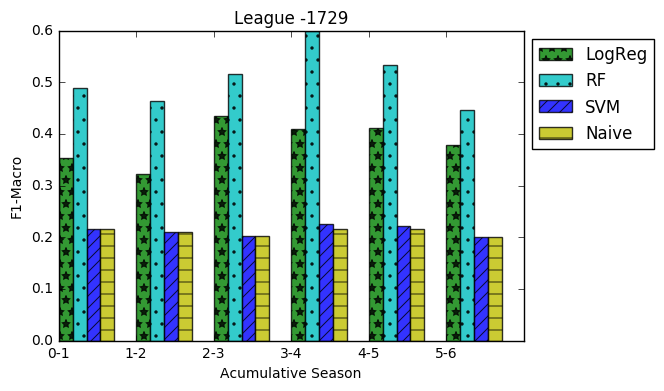

League - 4769
0-1
2000
1-2
2000
2-3
500
3-4
100
4-5
2000
5-6
500
LogReg
[0.43465045592705165, 0.37575757575757579, 0.43939393939393939, 0.43333333333333335, 0.39393939393939392, 0.44072948328267475]
---
RF
[0.37329030784588918, 0.39415343915343914, 0.38226495726495724, 0.42152638833311107, 0.42886460362575712, 0.39428625286682234]
---
SVM
[0.42249240121580545, 0.48484848484848486, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42249240121580545]
---
Naive
[0.42249240121580545, 0.49090909090909091, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42857142857142855]


League - 10257
0-1
50
1-2
3000
2-3
500
3-4
3000
4-5
50
5-6
50
LogReg
[0.44954128440366975, 0.43934426229508194, 0.45288753799392095, 0.5060606060606061, 0.42249240121580545, 0.48181818181818181]
---
RF
[0.40219063496241697, 0.40384384629142867, 0.42021499015212527, 0.42575153535645421, 0.36433841852013571, 0.42668243308568155]
---
SVM
[0.47400611620795113, 0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.40729483282674772, 0.45454545454545453]
---
Naive
[0.47400611620795113, 0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.41033434650455924, 0.45454545454545453]


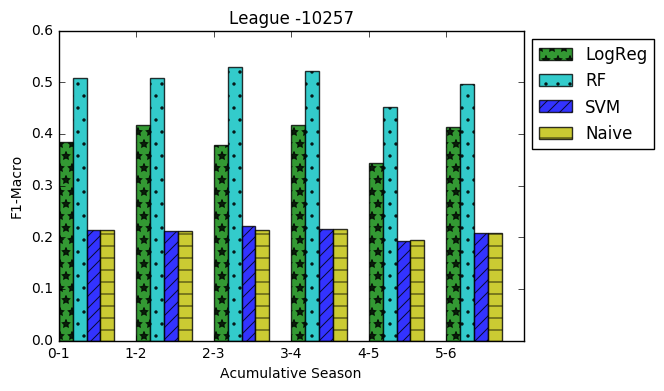

----AL - f1 K3----


NameError: name 'k3_f3' is not defined

In [42]:
print "----AL - f1 K2----"
al_rf_f1_k2 = k2_f1(data,leagues)
print "----AL - f1 K3----"
al_rf_f1_k3 = k3_f1(data,leagues)


----AL - f1 K3----
League - 21518
0-2
100
1-3
100
2-4
2000
3-5
3000
4-6
500
LogReg
[0.48787878787878786, 0.46666666666666667, 0.46666666666666667, 0.50303030303030305, 0.47272727272727272]
---
RF
[0.38748562226823097, 0.40216237663046178, 0.39851042888825089, 0.44803921568627453, 0.42589907120184006]
---
SVM
[0.5, 0.49393939393939396, 0.47878787878787876, 0.45757575757575752, 0.5]
---
Naive
[0.49393939393939396, 0.49090909090909091, 0.47878787878787876, 0.45454545454545453, 0.5]


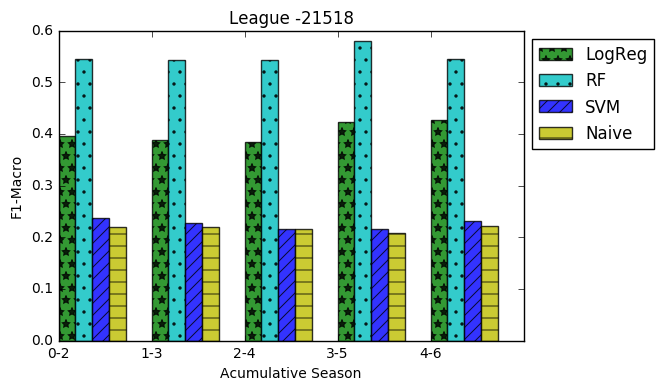

League - 1729
0-2
50
1-3
50
2-4
3000
3-5
1000
4-6
50
LogReg
[0.43030303030303024, 0.46969696969696972, 0.46363636363636362, 0.51818181818181819, 0.41818181818181815]
---
RF
[0.38309981062267845, 0.40263279258459655, 0.51186209878831201, 0.44912177672830805, 0.42817163660572072]
---
SVM
[0.45454545454545453, 0.43333333333333335, 0.47575757575757577, 0.46363636363636362, 0.43333333333333335]
---
Naive
[0.45757575757575752, 0.43333333333333335, 0.47575757575757577, 0.47878787878787876, 0.42727272727272725]


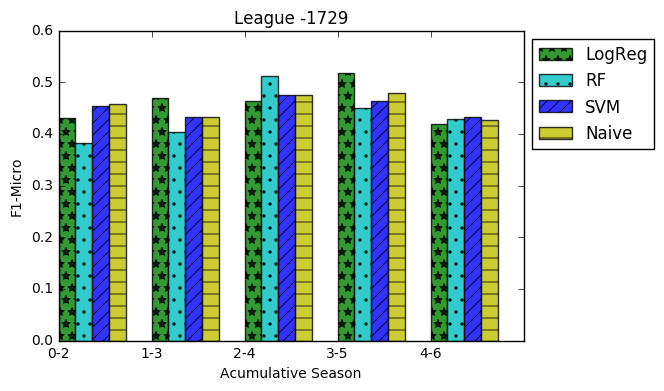

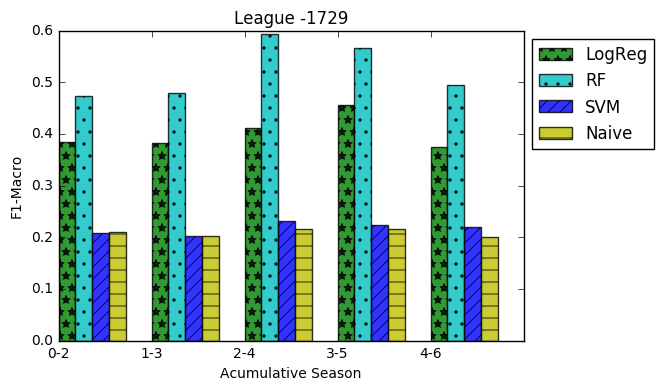

League - 4769
0-2
100
1-3
50
2-4
500
3-5
2000
4-6
100
LogReg
[0.42424242424242431, 0.43636363636363634, 0.45757575757575752, 0.44848484848484849, 0.46808510638297873]
---
RF
[0.42545443916553011, 0.41242412977185472, 0.42218481653033729, 0.41178038597784211, 0.4106759645442235]
---
SVM
[0.48787878787878786, 0.44545454545454544, 0.43333333333333335, 0.47878787878787876, 0.42249240121580545]
---
Naive
[0.49090909090909091, 0.44848484848484849, 0.43939393939393939, 0.47272727272727272, 0.42857142857142855]


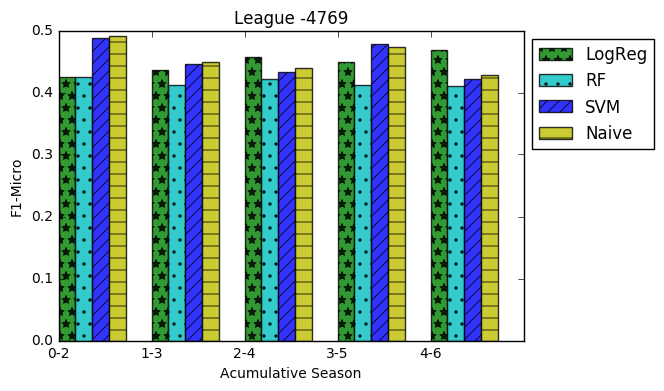

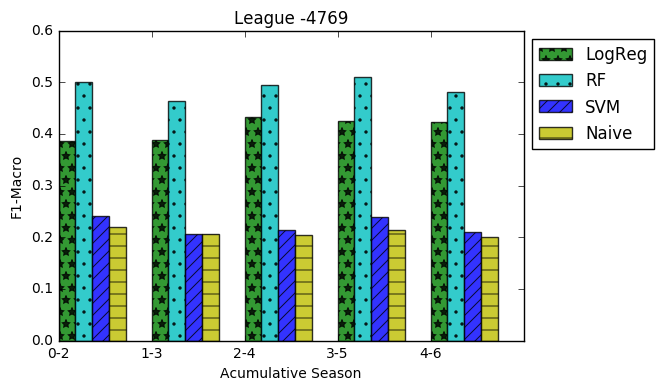

League - 10257
0-2
500
1-3
3000
2-4
50
3-5
500
4-6
500
LogReg
[0.46557377049180326, 0.48328267477203646, 0.49393939393939396, 0.45288753799392095, 0.47878787878787876]
---
RF
[0.42946232533701134, 0.43701689441803082, 0.44476517103883578, 0.40423924320632038, 0.43582226134684637]
---
SVM
[0.46885245901639344, 0.47416413373860183, 0.47878787878787876, 0.40729483282674772, 0.45151515151515154]
---
Naive
[0.46557377049180326, 0.47416413373860183, 0.47878787878787876, 0.41033434650455924, 0.45454545454545453]


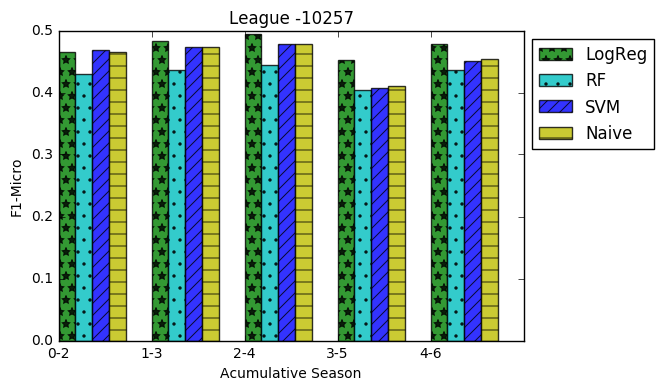

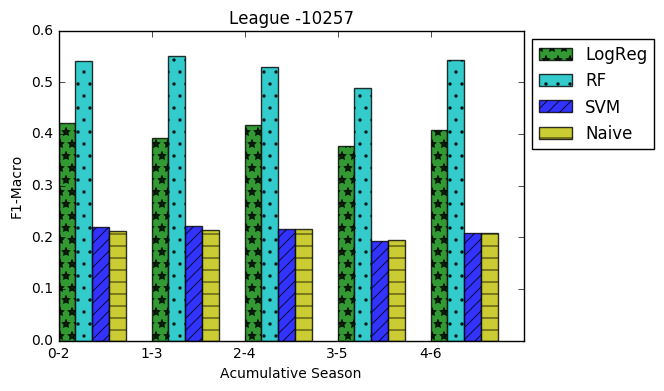

In [32]:

#teste da Filtragem com os dados da temporada 7
ft=[u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage']
ft2= [u'hg_V', u'hg_D', u'hg_E', u'hg_GF', u'hg_AVG_GF', u'hg_GS',
       u'hg_AVG_GS', u'hg_J1GS', u'hg_J1GF', u'hg_BTTS', u'hg_Over2',
       u'hg_Over3', u'hg_Over4', u'hg_WinningCleanSheet', u'hg_LosingFS',
       u'hg_FailedScore', u'hg_CleanSheet', u'hg_AVG_GOALS', u'hgc_V',
       u'hgc_D', u'hgc_E', u'hgc_GF', u'hgc_AVG_GF', u'hgc_GS',
       u'hgc_AVG_GS', u'hgc_J1GS', u'hgc_J1GF', u'hgc_BTTS', u'hgc_Over2',
       u'hgc_Over3', u'hgc_Over4', u'hgc_WinningCleanSheet',
       u'hgc_LosingFS', u'hgc_FailedScore', u'hgc_CleanSheet',
       u'hgc_AVG_GOALS', u'hl_V', u'hl_D', u'hl_E', u'hl_GF', u'hl_AVG_GF',
       u'hl_GS', u'hl_AVG_GS', u'hl_J1GS', u'hl_J1GF', u'hl_BTTS',
       u'hl_Over2', u'hl_Over3', u'hl_Over4', u'hl_WinningCleanSheet',
       u'hl_LosingFS', u'hl_FailedScore', u'hl_CleanSheet',
       u'hl_AVG_GOALS', u'hlc_V', u'hlc_D', u'hlc_E', u'hlc_GF',
       u'hlc_AVG_GF', u'hlc_GS', u'hlc_AVG_GS', u'hlc_J1GS', u'hlc_J1GF',
       u'hlc_BTTS', u'hlc_Over2', u'hlc_Over3', u'hlc_Over4',
       u'hlc_WinningCleanSheet', u'hlc_LosingFS', u'hlc_FailedScore',
       u'hlc_CleanSheet', u'hlc_AVG_GOALS', u'ag_V', u'ag_D', u'ag_E',
       u'ag_GF', u'ag_AVG_GF', u'ag_GS', u'ag_AVG_GS', u'ag_J1GS',
       u'ag_J1GF', u'ag_BTTS', u'ag_Over2', u'ag_Over3', u'ag_Over4',
       u'ag_WinningCleanSheet', u'ag_LosingFS', u'ag_FailedScore',
       u'ag_CleanSheet', u'ag_AVG_GOALS', u'agc_V', u'agc_D', u'agc_E',
       u'agc_GF', u'agc_AVG_GF', u'agc_GS', u'agc_AVG_GS', u'agc_J1GS',
       u'agc_J1GF', u'agc_BTTS', u'agc_Over2', u'agc_Over3', u'agc_Over4',
       u'agc_WinningCleanSheet', u'agc_LosingFS', u'agc_FailedScore',
       u'agc_CleanSheet', u'agc_AVG_GOALS', u'al_V', u'al_D', u'al_E',
       u'al_GF', u'al_AVG_GF', u'al_GS', u'al_AVG_GS', u'al_J1GS',
       u'al_J1GF', u'al_BTTS', u'al_Over2', u'al_Over3', u'al_Over4',
       u'al_WinningCleanSheet', u'al_LosingFS', u'al_FailedScore',
       u'al_CleanSheet', u'al_AVG_GOALS', u'alc_V', u'alc_D', u'alc_E',
       u'alc_GF', u'alc_AVG_GF', u'alc_GS', u'alc_AVG_GS', u'alc_J1GS',
       u'alc_J1GF', u'alc_BTTS', u'alc_Over2', u'alc_Over3', u'alc_Over4',
       u'alc_WinningCleanSheet', u'alc_LosingFS', u'alc_FailedScore',
       u'alc_CleanSheet', u'alc_AVG_GOALS', u'ga_rank_def', u'ga_rank_atk',
       u'gh_rank_def', u'gh_rank_atk', u'la_rank_def', u'la_rank_atk',
       u'lh_rank_def', u'lh_rank_atk', u'a_date', u'h_date', u'stage','B365H','B365D','B365A']
sf_train = sf_data[sf_data['season']<=5]
sf_test = sf_data[sf_data['season']==6]
sf_rf_score,sf_rf_estimator,sf_rf_max = setRF(sf_train[ft],sf_train['Output'],sf_test[ft],sf_test['Output'])

f_train = f_data[f_data['season']<=5]
f_test = f_data[f_data['season']==6]
f_rf_score,f_rf_estimator,f_rf_max = setRF(f_train[ft],f_train['Output'],f_test[ft],f_test['Output'])

eq_train = eq_data[eq_data['season']<=5]
eq_test = eq_data[eq_data['season']==6]
eq_rf_score,eq_rf_estimator,eq_rf_max = setRF(eq_train[ft],eq_train['Output'],eq_test[ft],eq_test['Output'])

eq_train = eq_data[eq_data['season']<=5]
eq_test = eq_data[eq_data['season']==6]
eq_rf_score,eq_rf_estimator,eq_rf_max = setRF(eq_train[ft],eq_train['Output'],eq_test[ft],eq_test['Output'])

all_train = data[data['season']<=5]
all_test = data[data['season']==6]
all_v = data[data['season']==7]
all_rf_score,all_rf_estimator,all_rf_max = setRF(all_train[ft2],all_train['Output'],all_test[ft2],all_test['Output'])

In [60]:
print sf_rf_score,f_rf_score,eq_rf_score
print all_rf_score
print (sf_rf_score * len(sf_test) + f_rf_score * len(f_test) + eq_rf_score*len(eq_test))/(len(sf_test)+len(f_test)+len(eq_test))
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print(u"Matriz de Confusão Normalizada")
    else:
        print(u'Matriz de Confusão')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = (cm.max()- cm.min())+cm.min()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Predita')
    
class_names = ['Visitante',"Empate",'Mandante']
sf_v=sf_data[sf_data['season']==7]
f_v=f_data[f_data['season']==7]
eq_v=eq_data[eq_data['season']==7]


sf_cnf_matrix = confusion_matrix(sf_v['Output'], sf_rf_max.predict(sf_v[ft]))
f_cnf_matrix = confusion_matrix(f_v['Output'], f_rf_max.predict(f_v[ft]))
eq_cnf_matrix = confusion_matrix(eq_v['Output'], eq_rf_max.predict(eq_v[ft]))
all_cnf_matrix = confusion_matrix(all_v['Output'], all_rf_max.predict(all_v[ft2]))

sf_cnf_matrix_c = confusion_matrix(sf_rf_max.predict(sf_v[ft]),sf_v['Output'])
f_cnf_matrix_c = confusion_matrix(f_rf_max.predict(f_v[ft]),f_v['Output'])
eq_cnf_matrix_c = confusion_matrix(eq_rf_max.predict(eq_v[ft]),eq_v['Output'])
all_cnf_matrix_c = confusion_matrix(all_rf_max.predict(all_v[ft2]),all_v['Output'])


0.752066115702 0.479923518164 0.322241681261
0.540561031084
0.499762018087


Matriz de Confusão
[[ 86   0  22]
 [ 15   0  57]
 [ 13   0 263]]


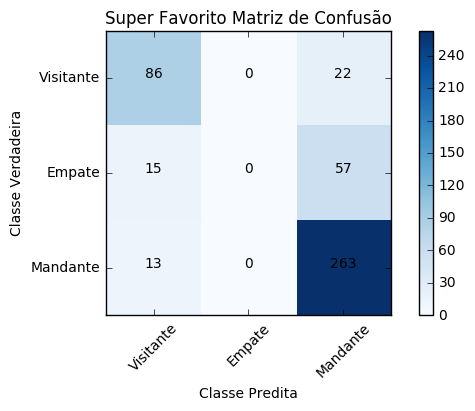

Matriz de Confusão Normalizada
[[ 0.7962963   0.          0.2037037 ]
 [ 0.20833333  0.          0.79166667]
 [ 0.04710145  0.          0.95289855]]


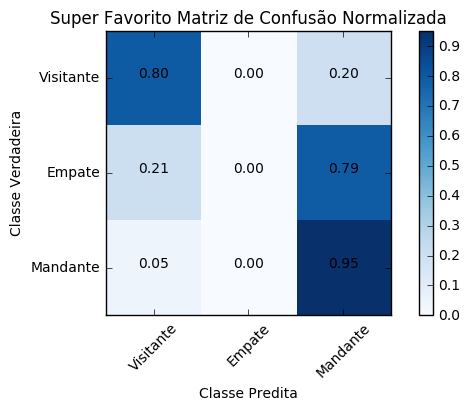

Matriz de Confusão
[[107   0 211]
 [ 50   6 217]
 [ 63   6 395]]


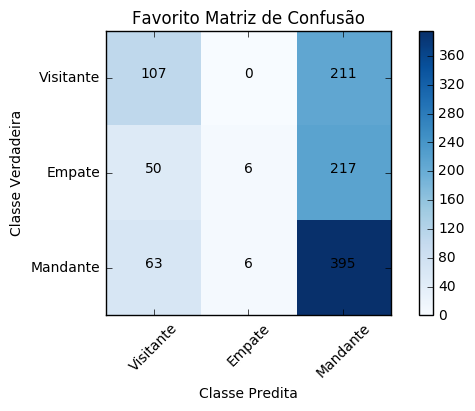

Matriz de Confusão Normalizada
[[ 0.33647799  0.          0.66352201]
 [ 0.18315018  0.02197802  0.79487179]
 [ 0.13577586  0.01293103  0.8512931 ]]


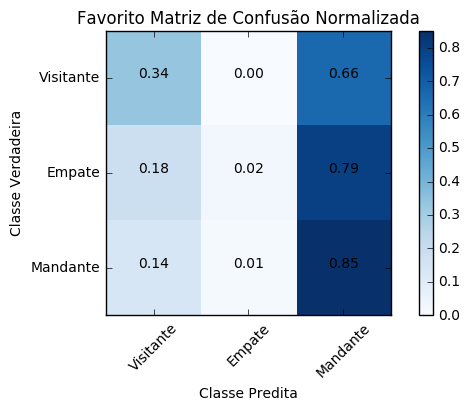

Matriz de Confusão
[[ 49  17 136]
 [ 42  15 135]
 [ 45  19 133]]


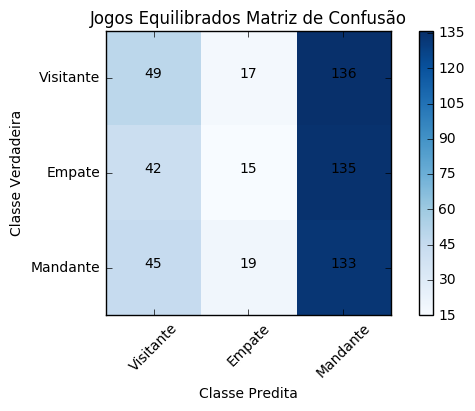

Matriz de Confusão Normalizada
[[ 0.24257426  0.08415842  0.67326733]
 [ 0.21875     0.078125    0.703125  ]
 [ 0.2284264   0.0964467   0.6751269 ]]


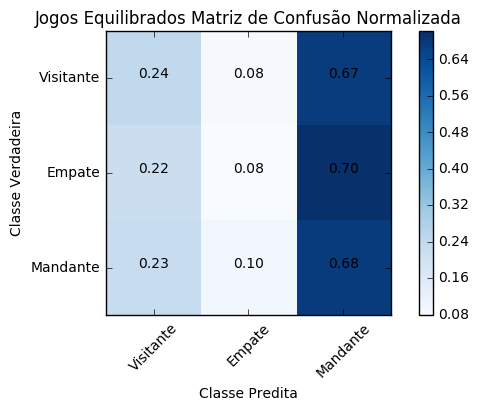

Matriz de Confusão
[[155  12 207]
 [ 90   7 251]
 [ 85   5 507]]


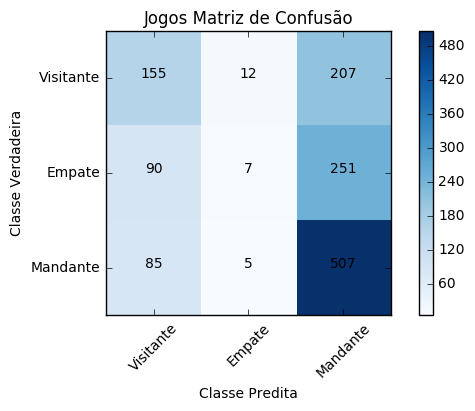

Matriz de Confusão Normalizada
[[ 0.4144385   0.03208556  0.55347594]
 [ 0.25862069  0.02011494  0.72126437]
 [ 0.14237856  0.00837521  0.84924623]]


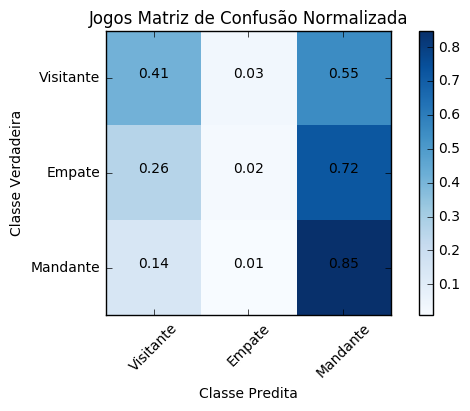

In [61]:
plt.figure()
plot_confusion_matrix(sf_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Super Favorito Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(sf_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Super Favorito Matriz de Confusão Normalizada')
plt.show()


plt.figure()
plot_confusion_matrix(f_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Favorito Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(f_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Favorito Matriz de Confusão Normalizada')
plt.show()


plt.figure()
plot_confusion_matrix(eq_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Jogos Equilibrados Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(eq_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Jogos Equilibrados Matriz de Confusão Normalizada')
plt.show()

plt.figure()
plot_confusion_matrix(all_cnf_matrix, classes=class_names, normalize=False,
                      title=u'Jogos Matriz de Confusão')
plt.show()
plt.figure()

plot_confusion_matrix(all_cnf_matrix, classes=class_names, normalize=True,
                      title=u'Jogos Matriz de Confusão Normalizada')
plt.show()


/home/felipef/anaconda2/envs/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide


Matriz de Confusão Normalizada
[[ 0.75438596  0.13157895  0.11403509]
 [        nan         nan         nan]
 [ 0.06432749  0.16666667  0.76900585]]


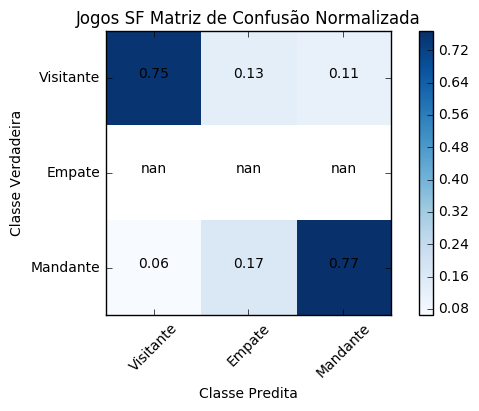

Matriz de Confusão Normalizada
[[ 0.48636364  0.22727273  0.28636364]
 [ 0.          0.5         0.5       ]
 [ 0.2563791   0.2636695   0.4799514 ]]


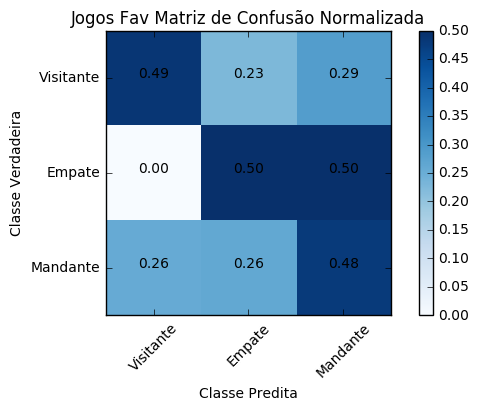

Matriz de Confusão Normalizada
[[ 0.36029412  0.30882353  0.33088235]
 [ 0.33333333  0.29411765  0.37254902]
 [ 0.33663366  0.33415842  0.32920792]]


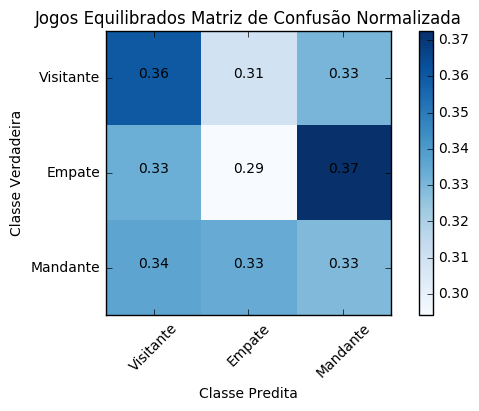

Matriz de Confusão Normalizada
[[ 0.46969697  0.27272727  0.25757576]
 [ 0.5         0.29166667  0.20833333]
 [ 0.21450777  0.26010363  0.5253886 ]]


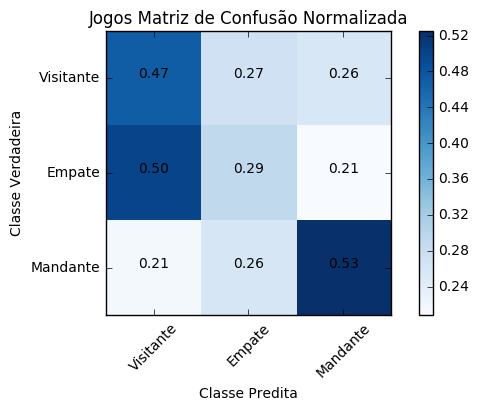

In [62]:
plt.figure()

plot_confusion_matrix(sf_cnf_matrix_c, classes=class_names, normalize=True,
                      title=u'Jogos SF Matriz de Confusão Normalizada')
plt.show()
plt.figure()

plot_confusion_matrix(f_cnf_matrix_c, classes=class_names, normalize=True,
                      title=u'Jogos Fav Matriz de Confusão Normalizada')
plt.show()
plt.figure()

plot_confusion_matrix(eq_cnf_matrix_c, classes=class_names, normalize=True,
                      title=u'Jogos Equilibrados Matriz de Confusão Normalizada')
plt.show()

plt.figure()

plot_confusion_matrix(all_cnf_matrix_c, classes=class_names, normalize=True,
                      title=u'Jogos Matriz de Confusão Normalizada')
plt.show()

In [54]:
d = data[data['season']==7]

al=0
filtro=0
it=0
saldo=0
print len(d)
for index, row in d.iterrows():
    it = it+1
    print it
    
    if list(row['Output']) == all_rf_max.predict(row[ft2].values.reshape(1, -1)):
        al=al+1
    if (row['B365H']<=1.5 or row['B365A']<=1.5):
             
        if list(row['Output']) == sf_rf_max.predict(row[ft].values.reshape(1, -1)):
            filtro=filtro+1
            
    elif (row['B365H']<=2.22 or row['B365A']<=2.22):
        if list(row['Output']) == f_rf_max.predict(row[ft].values.reshape(1, -1)):
            filtro=filtro+1
    else:
        if list(row['Output']) == eq_rf_max.predict(row[ft].values.reshape(1, -1)):
            filtro=filtro+1
            
print al,filtro

print (al*1.)/len(d)
print (filtro*1.)/len(d)

1319
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

In [46]:
data['Output'][0] == str(eq_rf_max.predict(d[ft])[0])
print filtro

0


In [10]:
f = open('sf_rf_max.pckl', 'wb')
pickle.dump(sf_rf_max, f)
f.close()

f = open('f_rf_max.pckl', 'wb')
pickle.dump(f_rf_max, f)
f.close()

f = open('eq_rf_max.pckl', 'wb')
pickle.dump(eq_rf_max, f)
f.close()

NameError: name 'pickle' is not defined

In [59]:
def ft_importance(rf):
    a=rf.feature_importances_
    return (ft[a.argmax(axis=0)],a.max(axis=0))

#Carregar arquivo
import pickle
f = open('store.pckl', 'rb')
obj = pickle.load(f)
f.close()

